In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Load results
with open('resultados_Step_8.json', 'r', encoding='utf-8') as f:
    results = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(results)

# Add model type column
df['model_type'] = df['model_name'].apply(lambda x: 'BERT' if 'bert' in x.lower() else 'GPT')

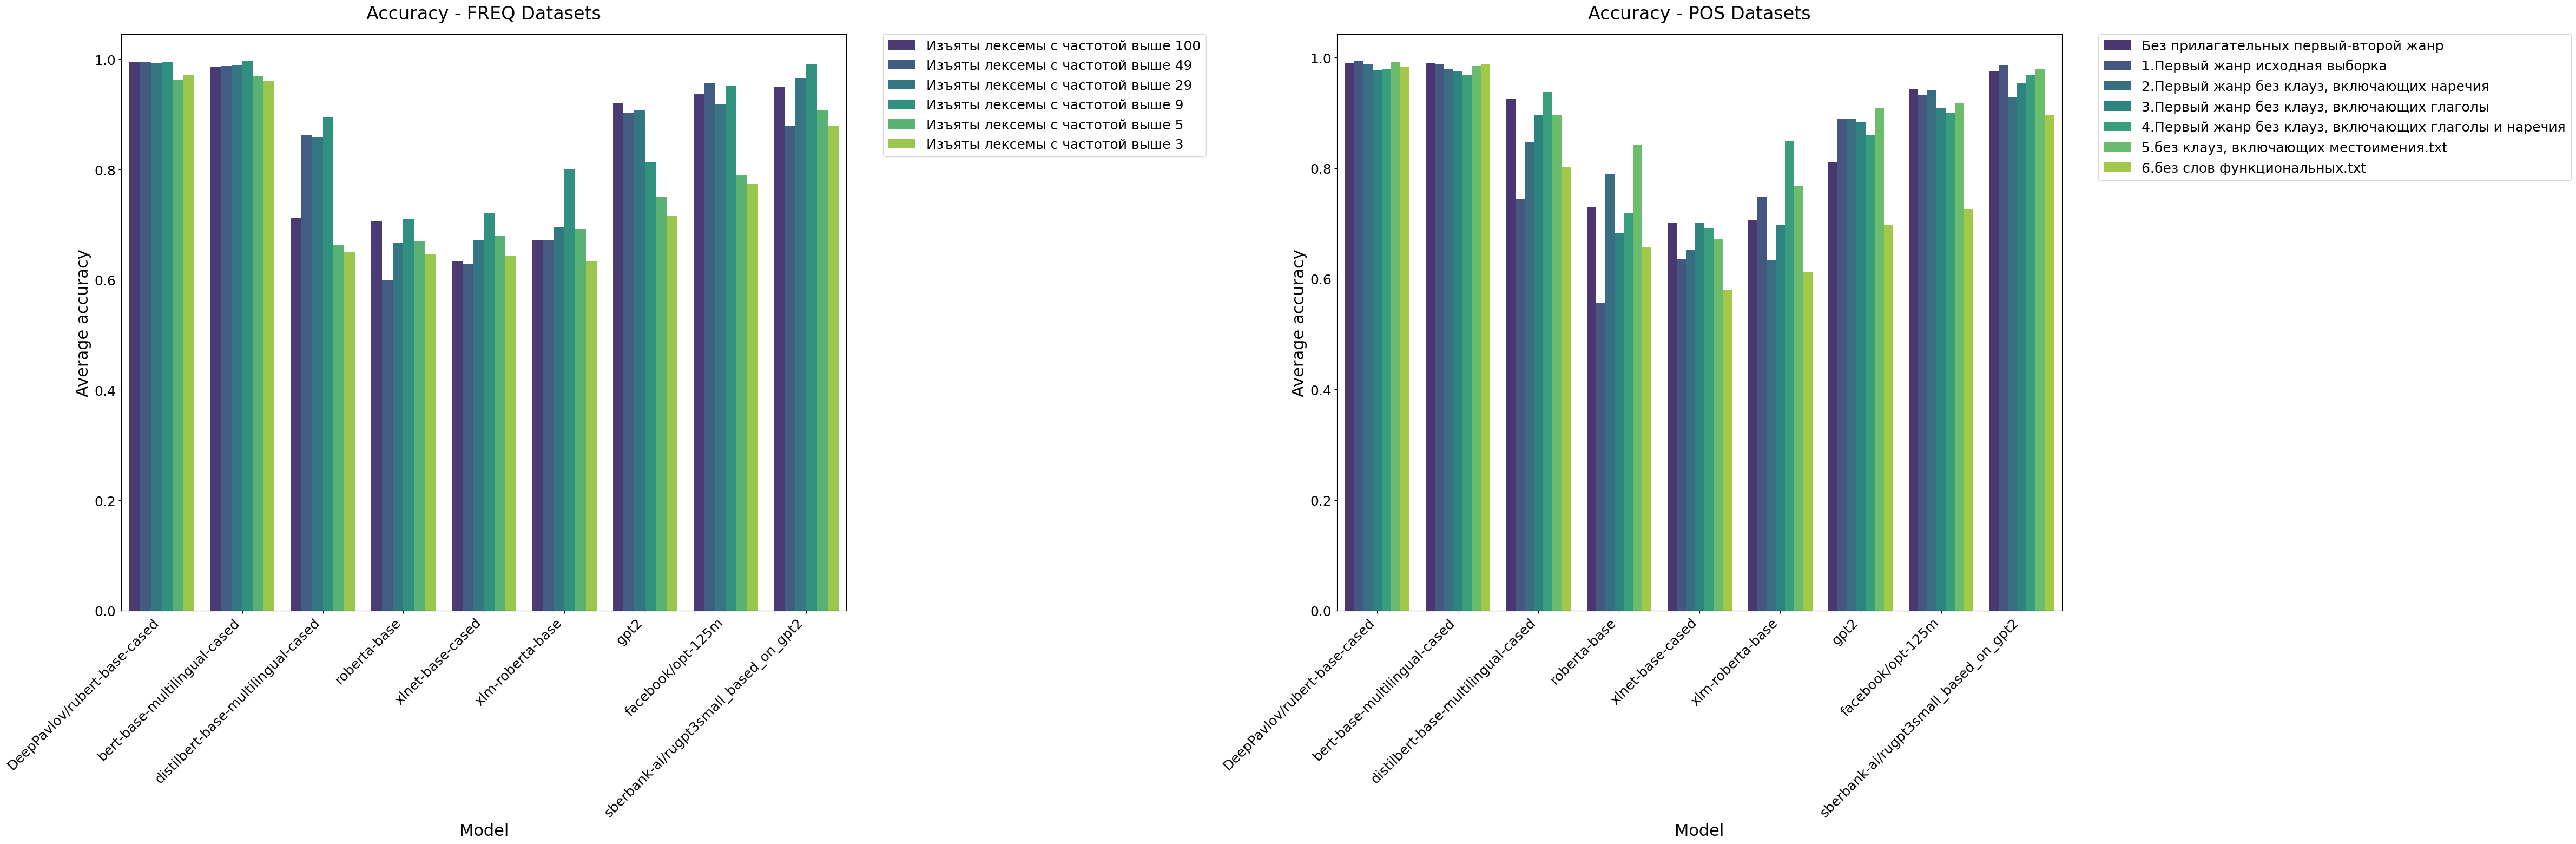

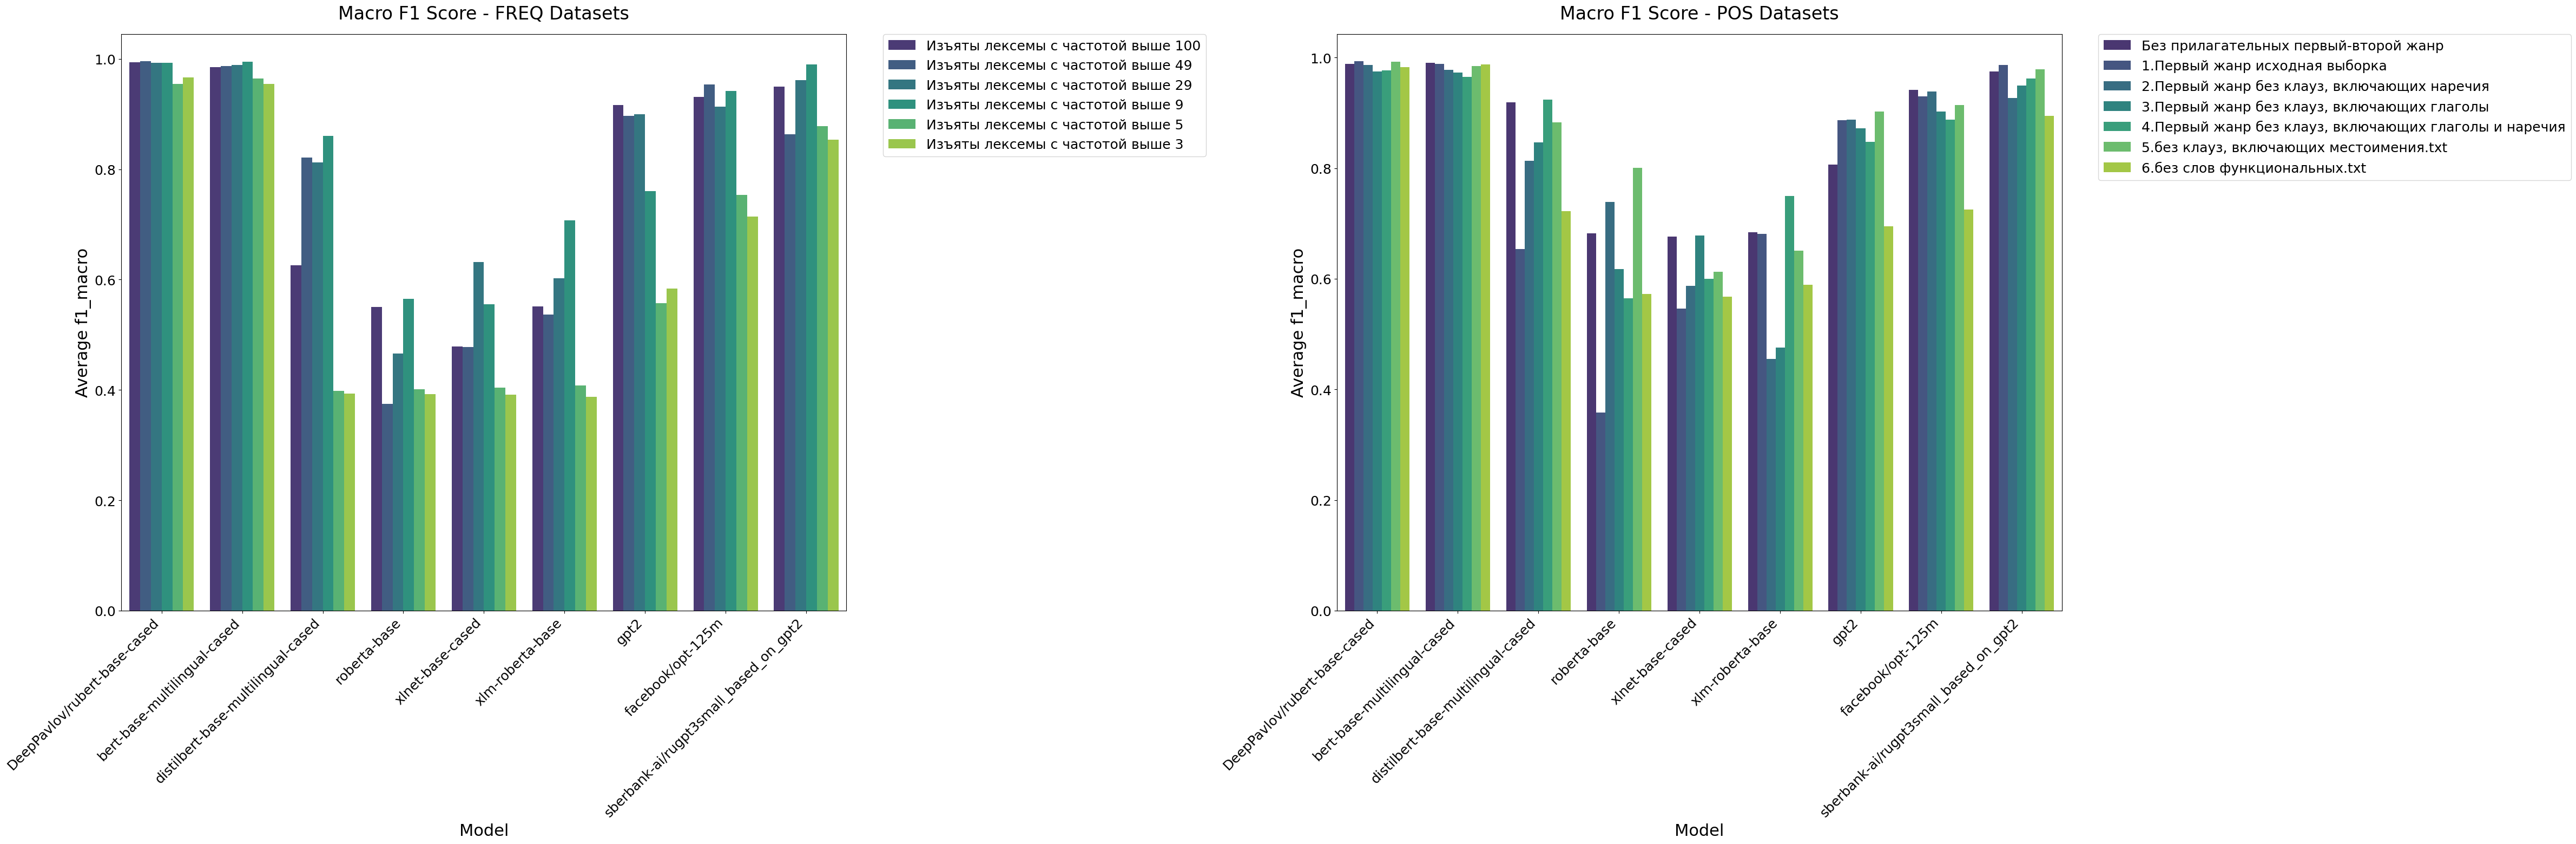

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric_by_dataset_type(metric, title):
    # Increase figure size for larger image
    plt.figure(figsize=(48, 16))
    
    # Set global font sizes
    plt.rcParams.update({
        'font.size': 20,          # General font size
        'axes.titlesize': 24,     # Title font size
        'axes.labelsize': 22,     # Axis label font size
        'xtick.labelsize': 18,    # X-tick label font size
        'ytick.labelsize': 18,    # Y-tick label font size
        'legend.fontsize': 18     # Legend font size
    })
    
    # Split by dataset type
    for dataset_type in ['freq', 'pos']:
        subset = df[df['dataset_type'] == dataset_type]
        
        if not subset.empty:
            plt.subplot(1, 2, 1 if dataset_type == 'freq' else 2)
            sns.barplot(data=subset, x='model_name', y=f'avg_{metric}', hue='dataset_name', 
                        palette='viridis', errorbar='sd')
            plt.title(f'{title} - {dataset_type.upper()} Datasets', pad=20)
            plt.xticks(rotation=45, ha='right')
            plt.ylabel(f'Average {metric}')
            plt.xlabel('Model')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            
    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Save with higher DPI for better quality
    plt.savefig(f'plots/{metric}_by_dataset_type_step_8.png', bbox_inches='tight', dpi=400)
    plt.show()

# Plot accuracy and F1
plot_metric_by_dataset_type('accuracy', 'Accuracy')
plot_metric_by_dataset_type('f1_macro', 'Macro F1 Score')

In [3]:
def create_performance_tables():
    # Create a table for each dataset type
    for dataset_type in ['freq', 'pos']:
        subset = df[df['dataset_type'] == dataset_type]
        if subset.empty:
            continue
            
        # Select relevant columns
        table_cols = ['model_name', 'dataset_name', 'avg_accuracy', 'std_accuracy', 
                     'avg_f1_macro', 'std_f1_macro', 'avg_roc_auc', 'std_roc_auc']
        
        # Create and display table
        table = subset[table_cols].sort_values(by=['dataset_name', 'avg_accuracy'], ascending=False)
        print(f"\nPerformance Table - {dataset_type.upper()} Datasets:")
        display(table)
        
        # Save to CSV
        table.to_csv(f'plots/performance_table_{dataset_type}_Step_8.csv', index=False)

create_performance_tables()


Performance Table - FREQ Datasets:


model_name                        dataset_name  avg_accuracy  std_accuracy  \
3       gpt2    Изъяты лексемы с частотой выше 9      0.811008      0.022400   
4       gpt2    Изъяты лексемы с частотой выше 5      0.785553      0.032539   
1       gpt2   Изъяты лексемы с частотой выше 49      0.911778      0.019781   
5       gpt2    Изъяты лексемы с частотой выше 3      0.659849      0.064967   
2       gpt2   Изъяты лексемы с частотой выше 29      0.908916      0.013284   
0       gpt2  Изъяты лексемы с частотой выше 100      0.883224      0.018115   

   avg_f1_macro  std_f1_macro  avg_roc_auc  std_roc_auc  
3      0.776366      0.033256     0.909193     0.025080  
4      0.643503      0.111451     0.830406     0.023985  
1      0.906103      0.019970     0.970286     0.005481  
5      0.517998      0.140121     0.772239     0.050268  
2      0.902682      0.010746     0.970849     0.005553  
0      0.872708      0.025099     0.966643     0.006150


Performance Table - POS Datasets:


model_name                                       dataset_name  \
6        gpt2              Без прилагательных первый-второй жанр   
12       gpt2                      6.без слов функциональных.txt   
11       gpt2            5.без клауз, включающих местоимения.txt   
10       gpt2  4.Первый жанр без клауз, включающих глаголы и ...   
9        gpt2        3.Первый жанр без клауз, включающих глаголы   
8        gpt2        2.Первый жанр без клауз, включающих наречия   
7        gpt2                     1.Первый жанр исходная выборка   

    avg_accuracy  std_accuracy  avg_f1_macro  std_f1_macro  avg_roc_auc  \
6       0.790699      0.058205      0.785228      0.053399     0.929366   
12      0.737673      0.041181      0.736576      0.040755     0.839080   
11      0.916503      0.023261      0.911560      0.023697     0.972020   
10      0.860265      0.051874      0.847271      0.049445     0.955771   
9       0.860233      0.031891      0.847835      0.025898     0.953701   
8       0.874503      0.068988      0.869557      0.070646     0.965629   
7       0.843648      0.044166      0.836346      0.048865     0.953035   

    std_roc_auc  
6      0.029018  
12     0.032697  
11     0.010585  
10     0.018453  
9      0.010024  
8      0.011234  
7      0.016486

Asignación de colores por modelo:
  DeepPavlov/rubert-base-cased: #AEC6CF
  bert-base-multilingual-cased: #FFB6C1
  distilbert-base-multilingual-cased: #98FF98
  roberta-base: #FFDAB9
  gpt2: #E6E6FA
  facebook/opt-125m: #F0E68C
  sberbank-ai/rugpt3small_based_on_gpt2: #ADD8E6
Modelos encontrados: 7

Procesando modelo: DeepPavlov/rubert-base-cased
Procesando modelo: bert-base-multilingual-cased


Procesando modelo: distilbert-base-multilingual-cased
Procesando modelo: roberta-base

Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_bert-base-multilingual-cased.png
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_distilbert-base-multilingual-cased.png


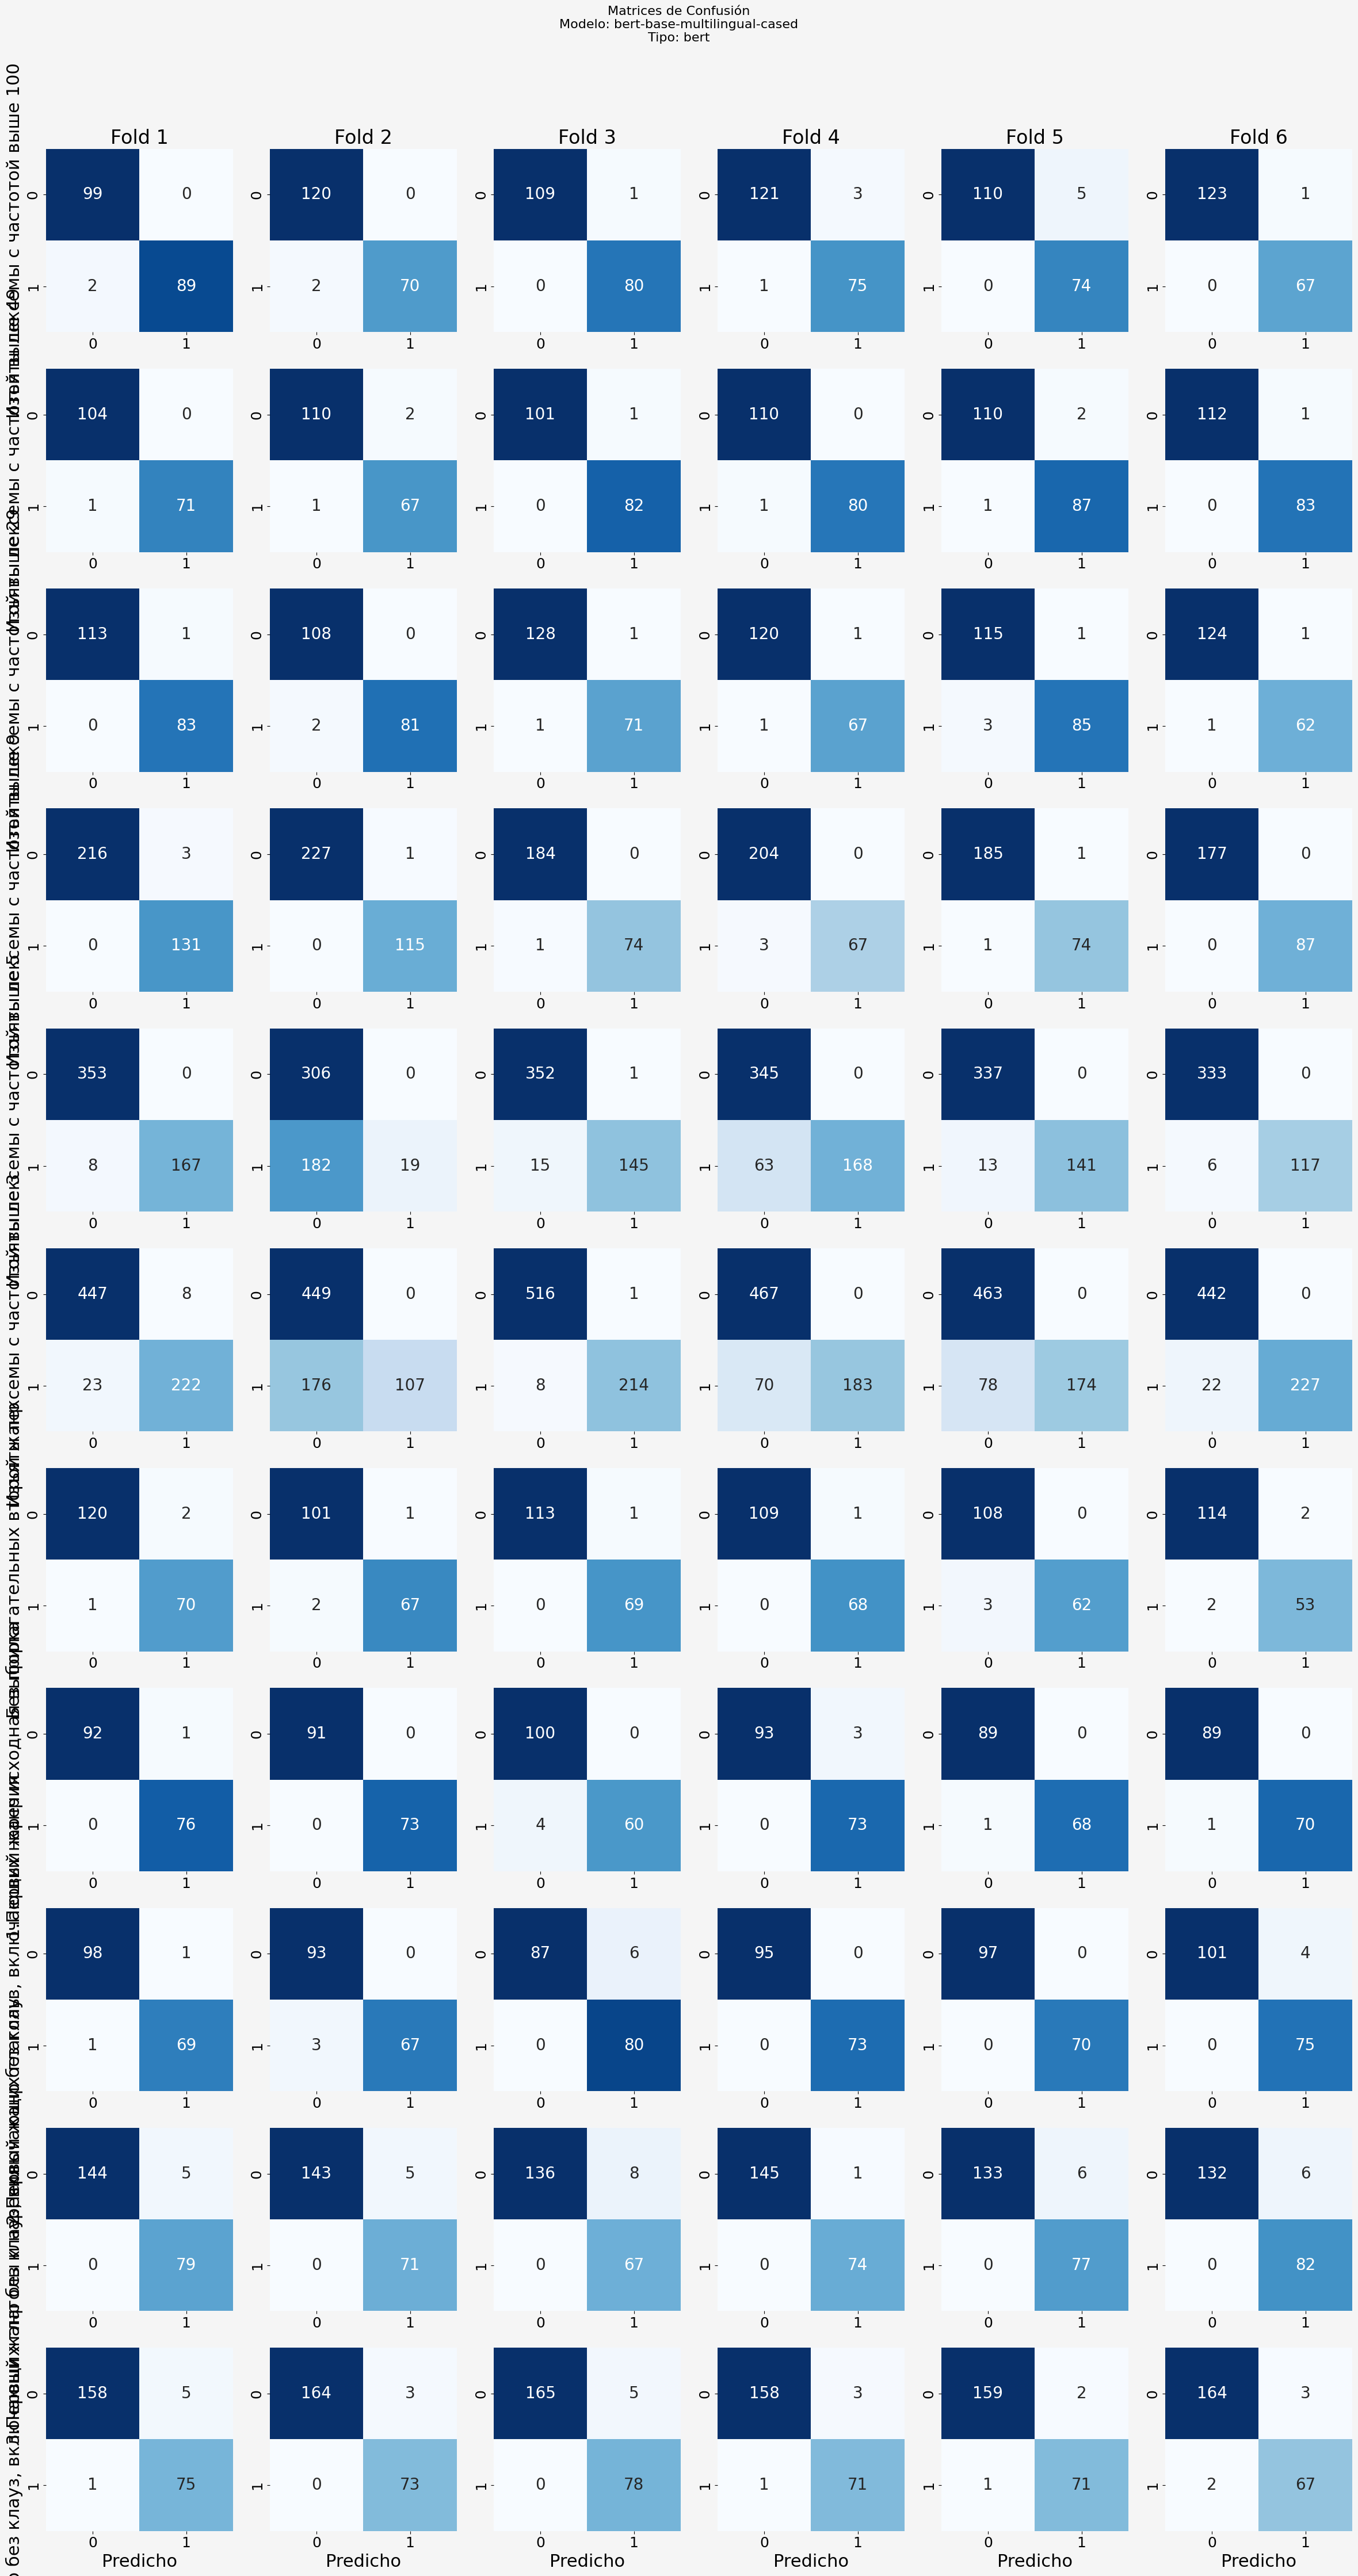


Procesando modelo: gpt2
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_roberta-base.png


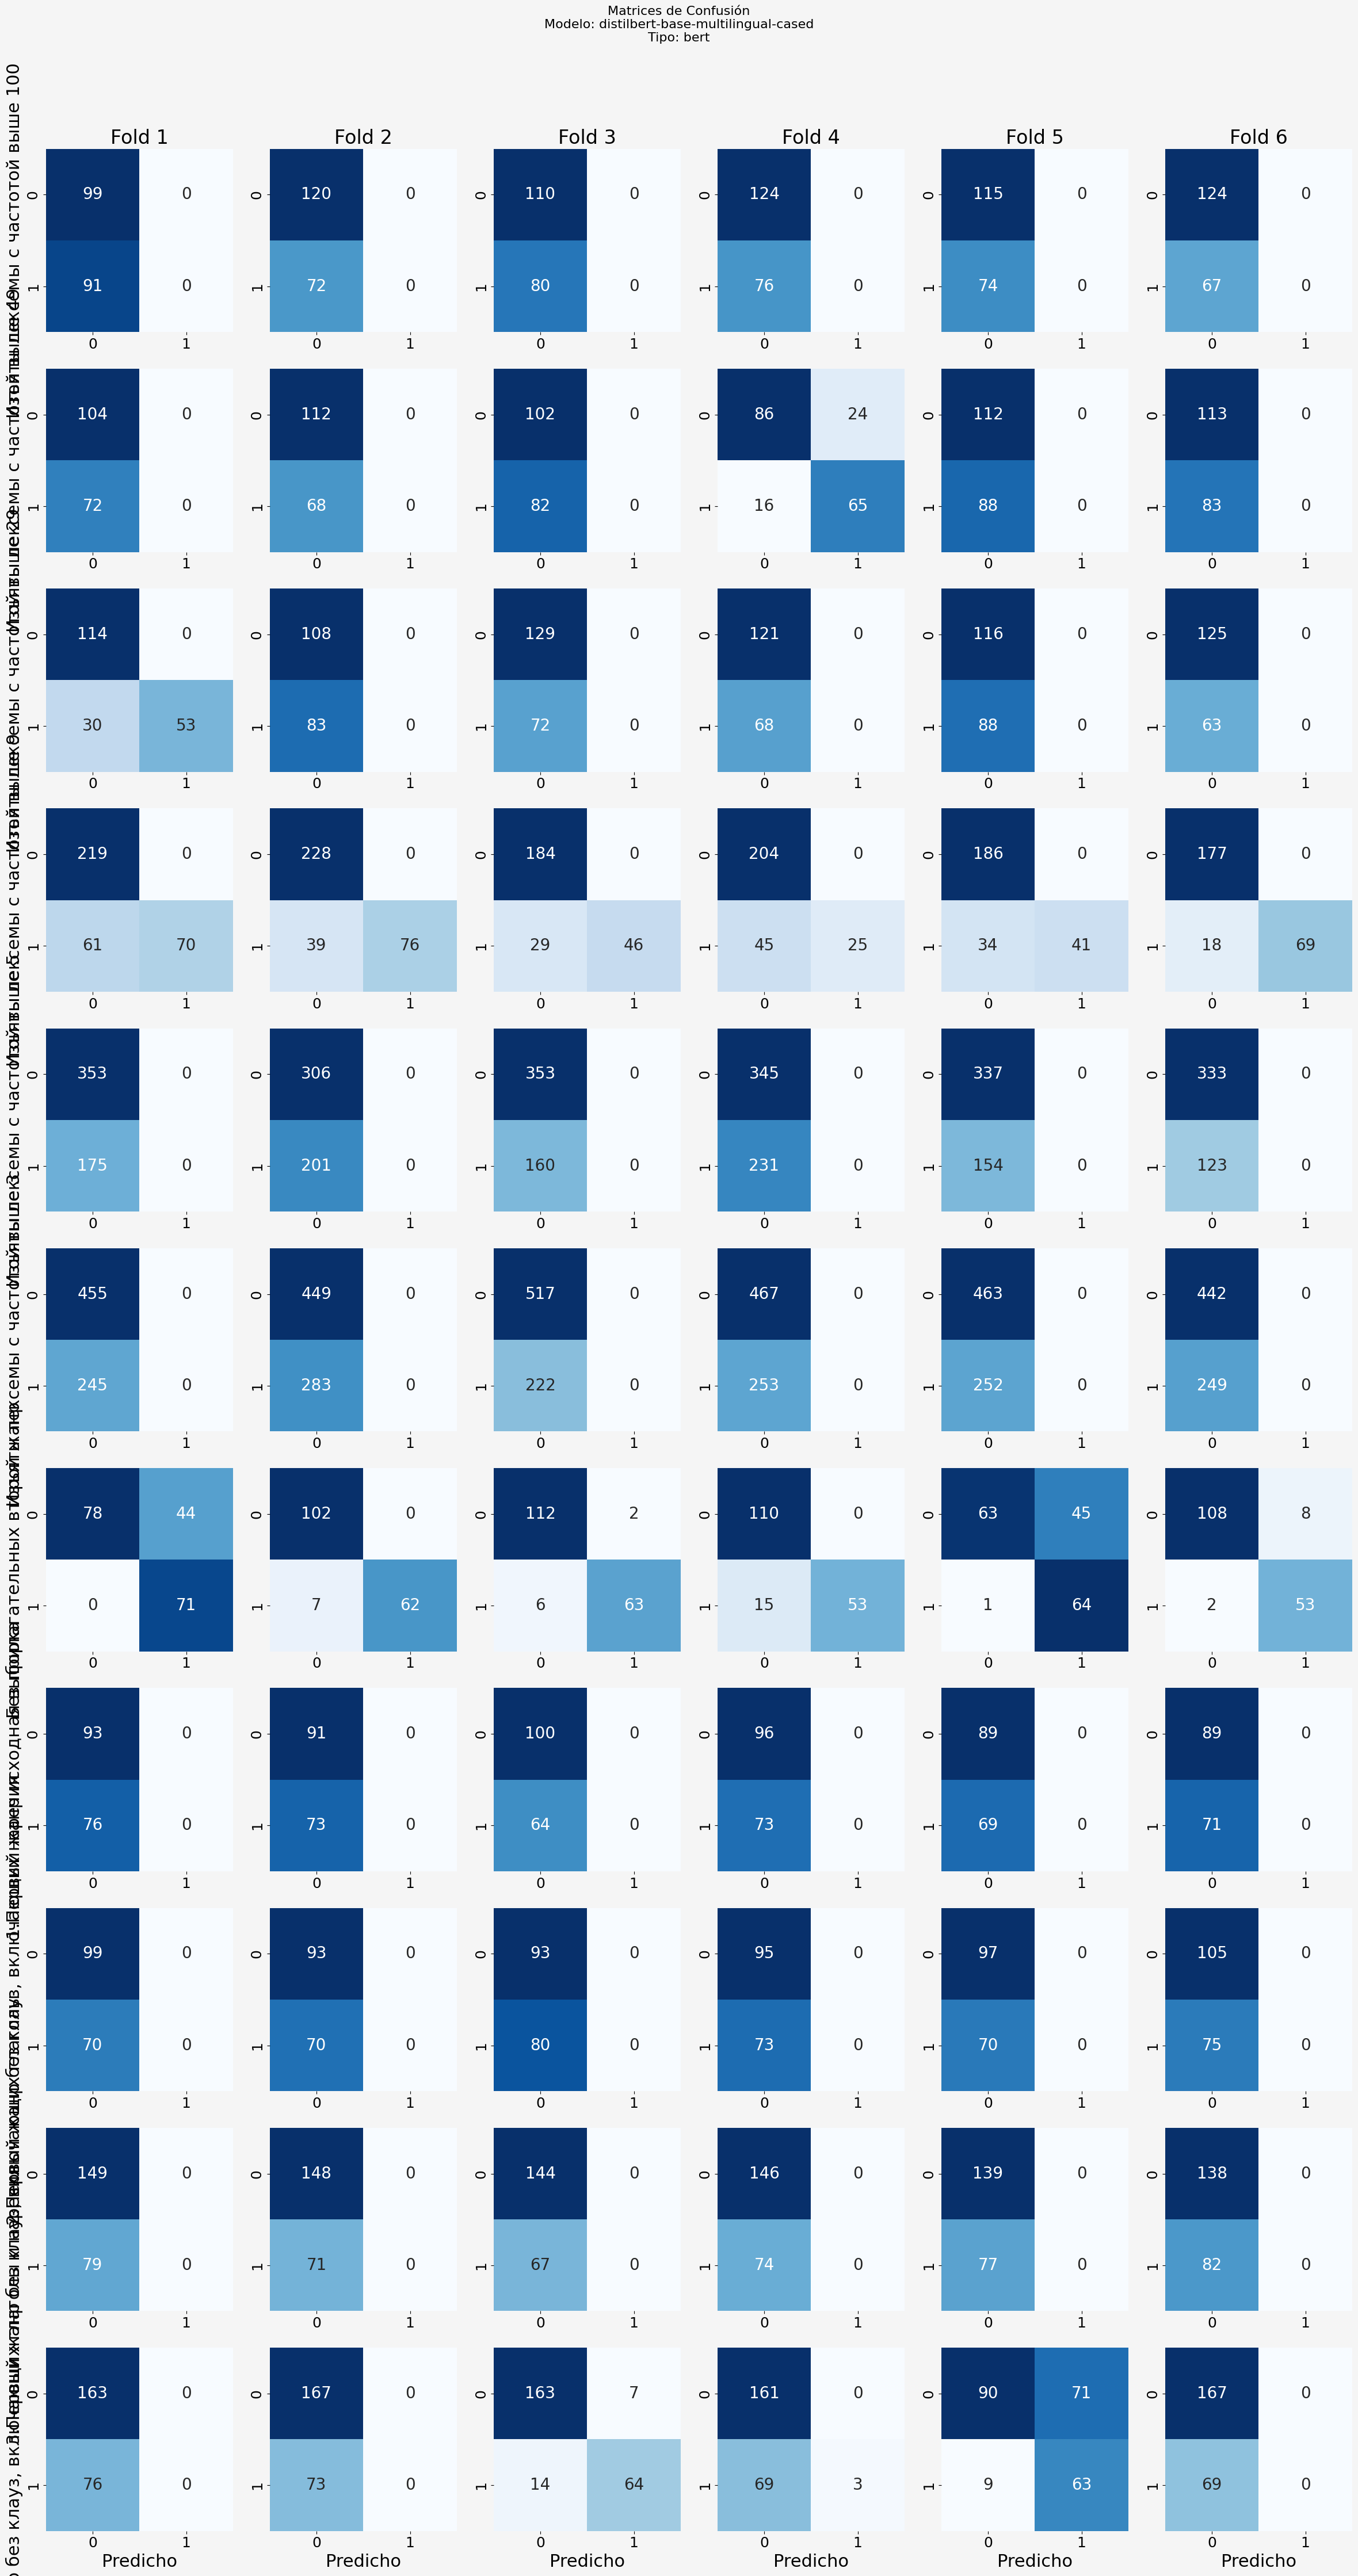


Procesando modelo: facebook/opt-125m
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_DeepPavlov_rubert-base-cased.png


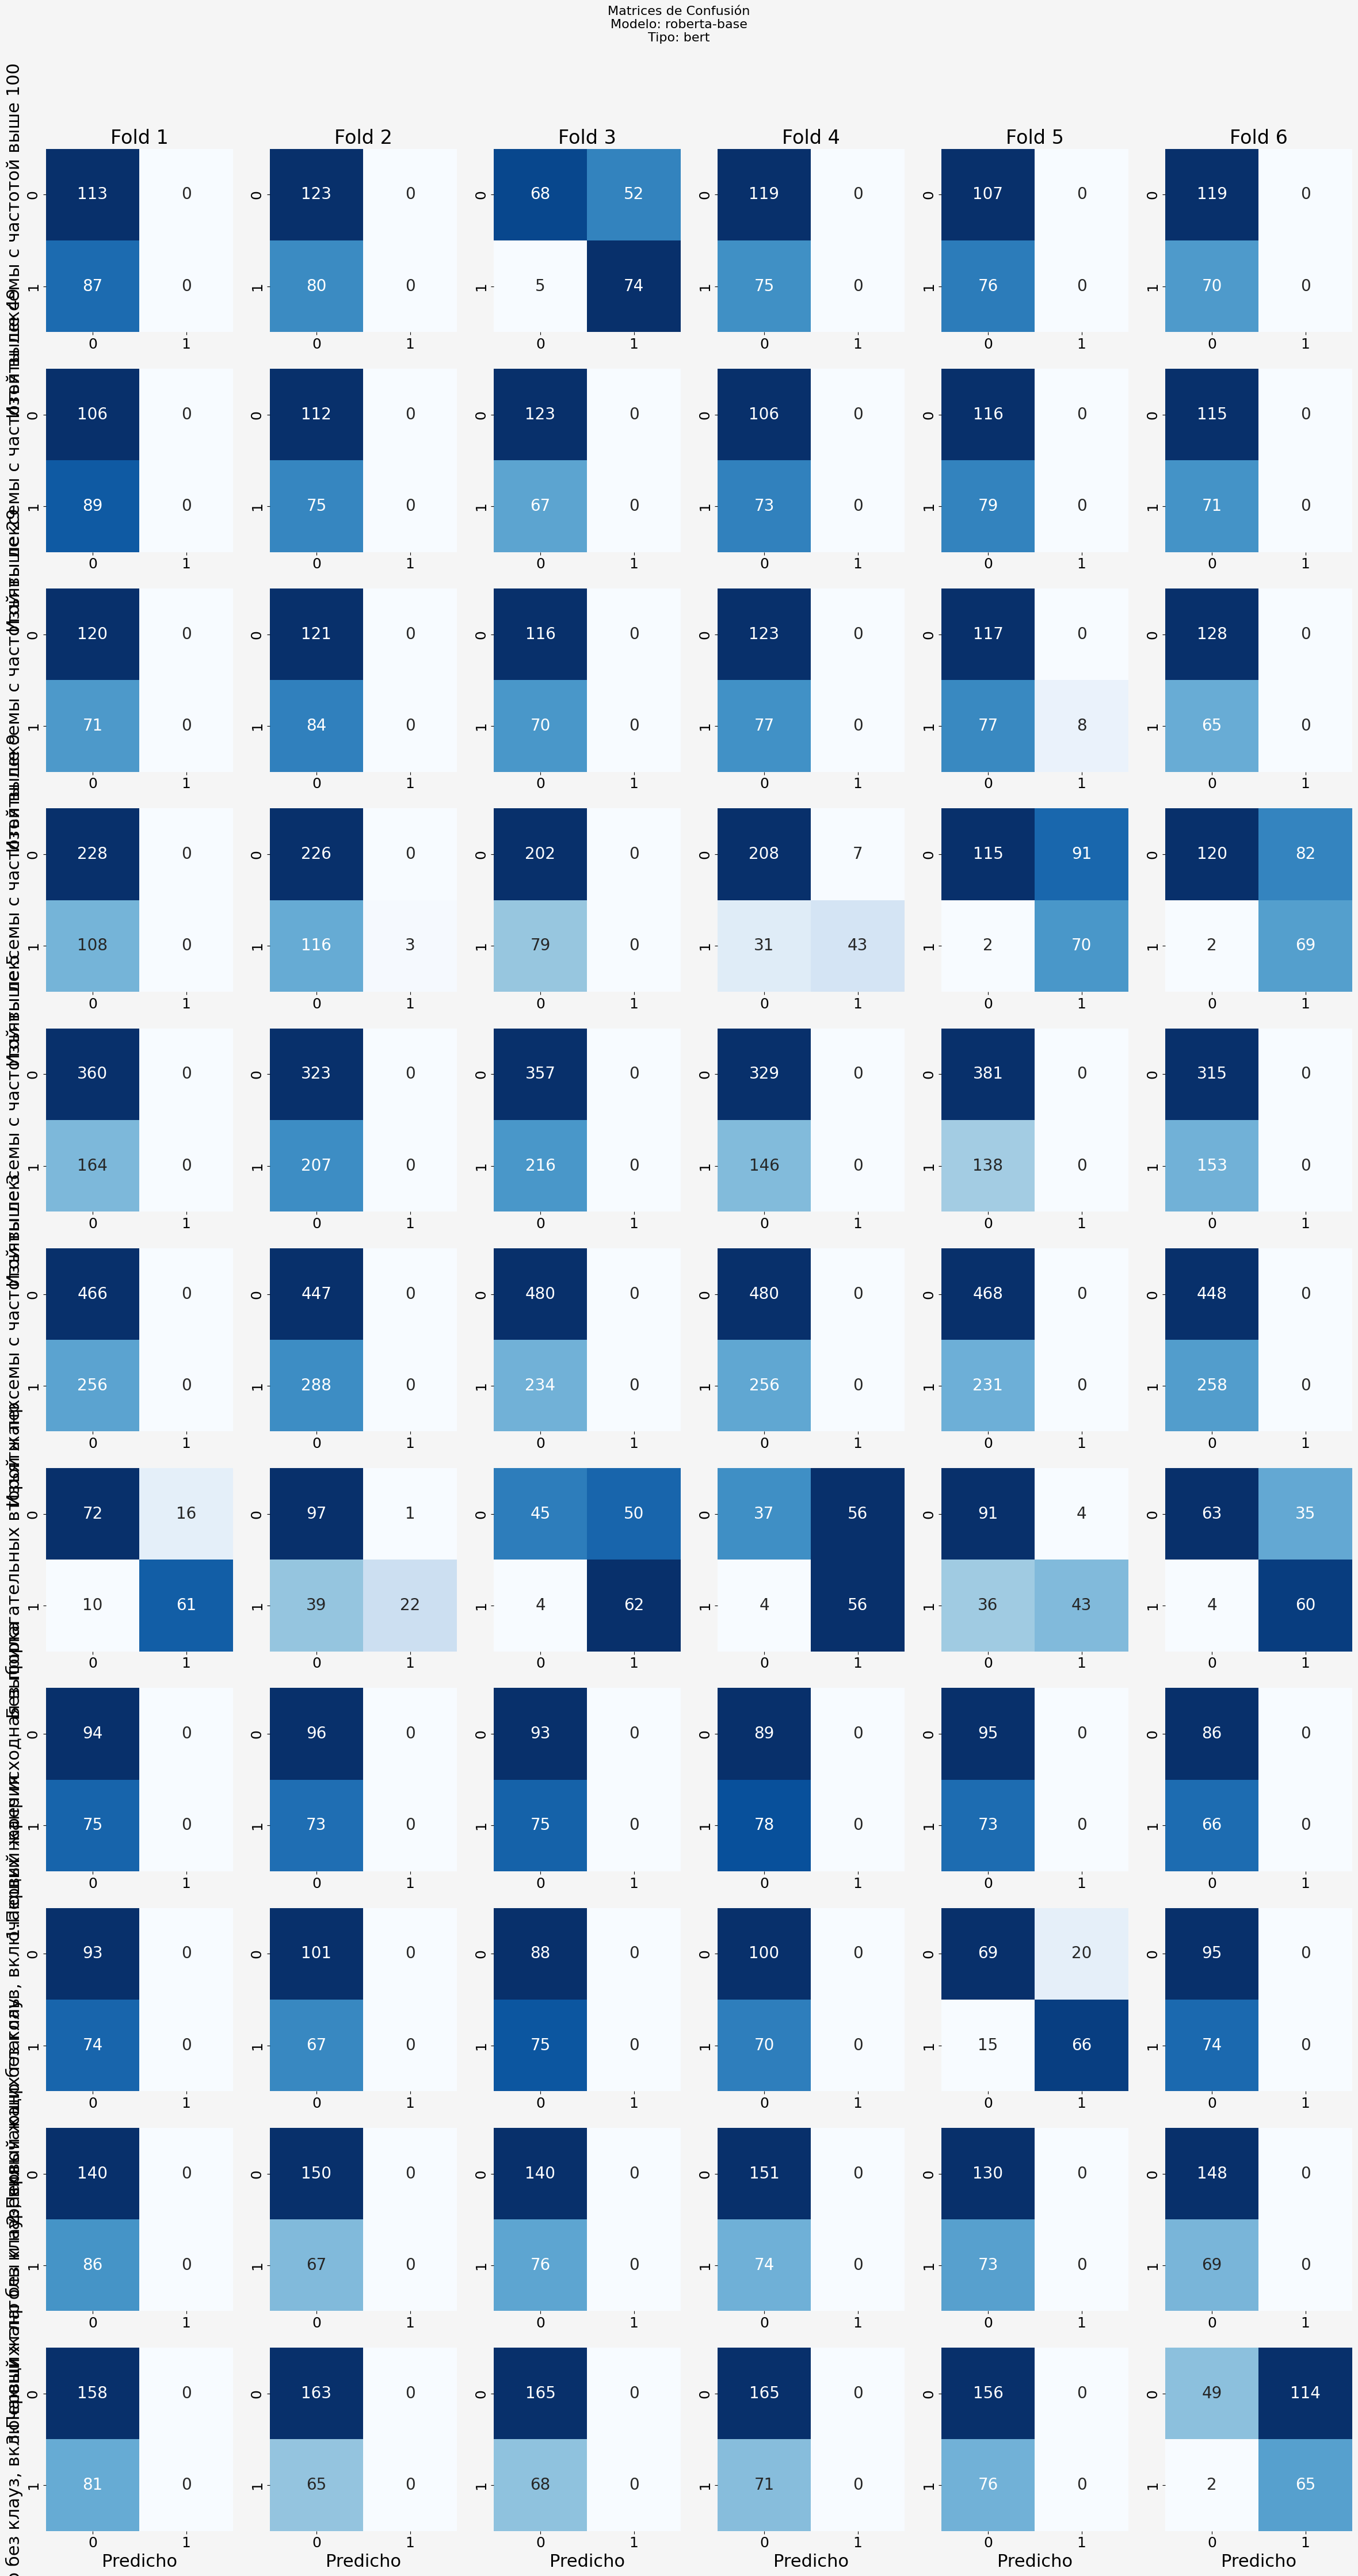


Procesando modelo: sberbank-ai/rugpt3small_based_on_gpt2


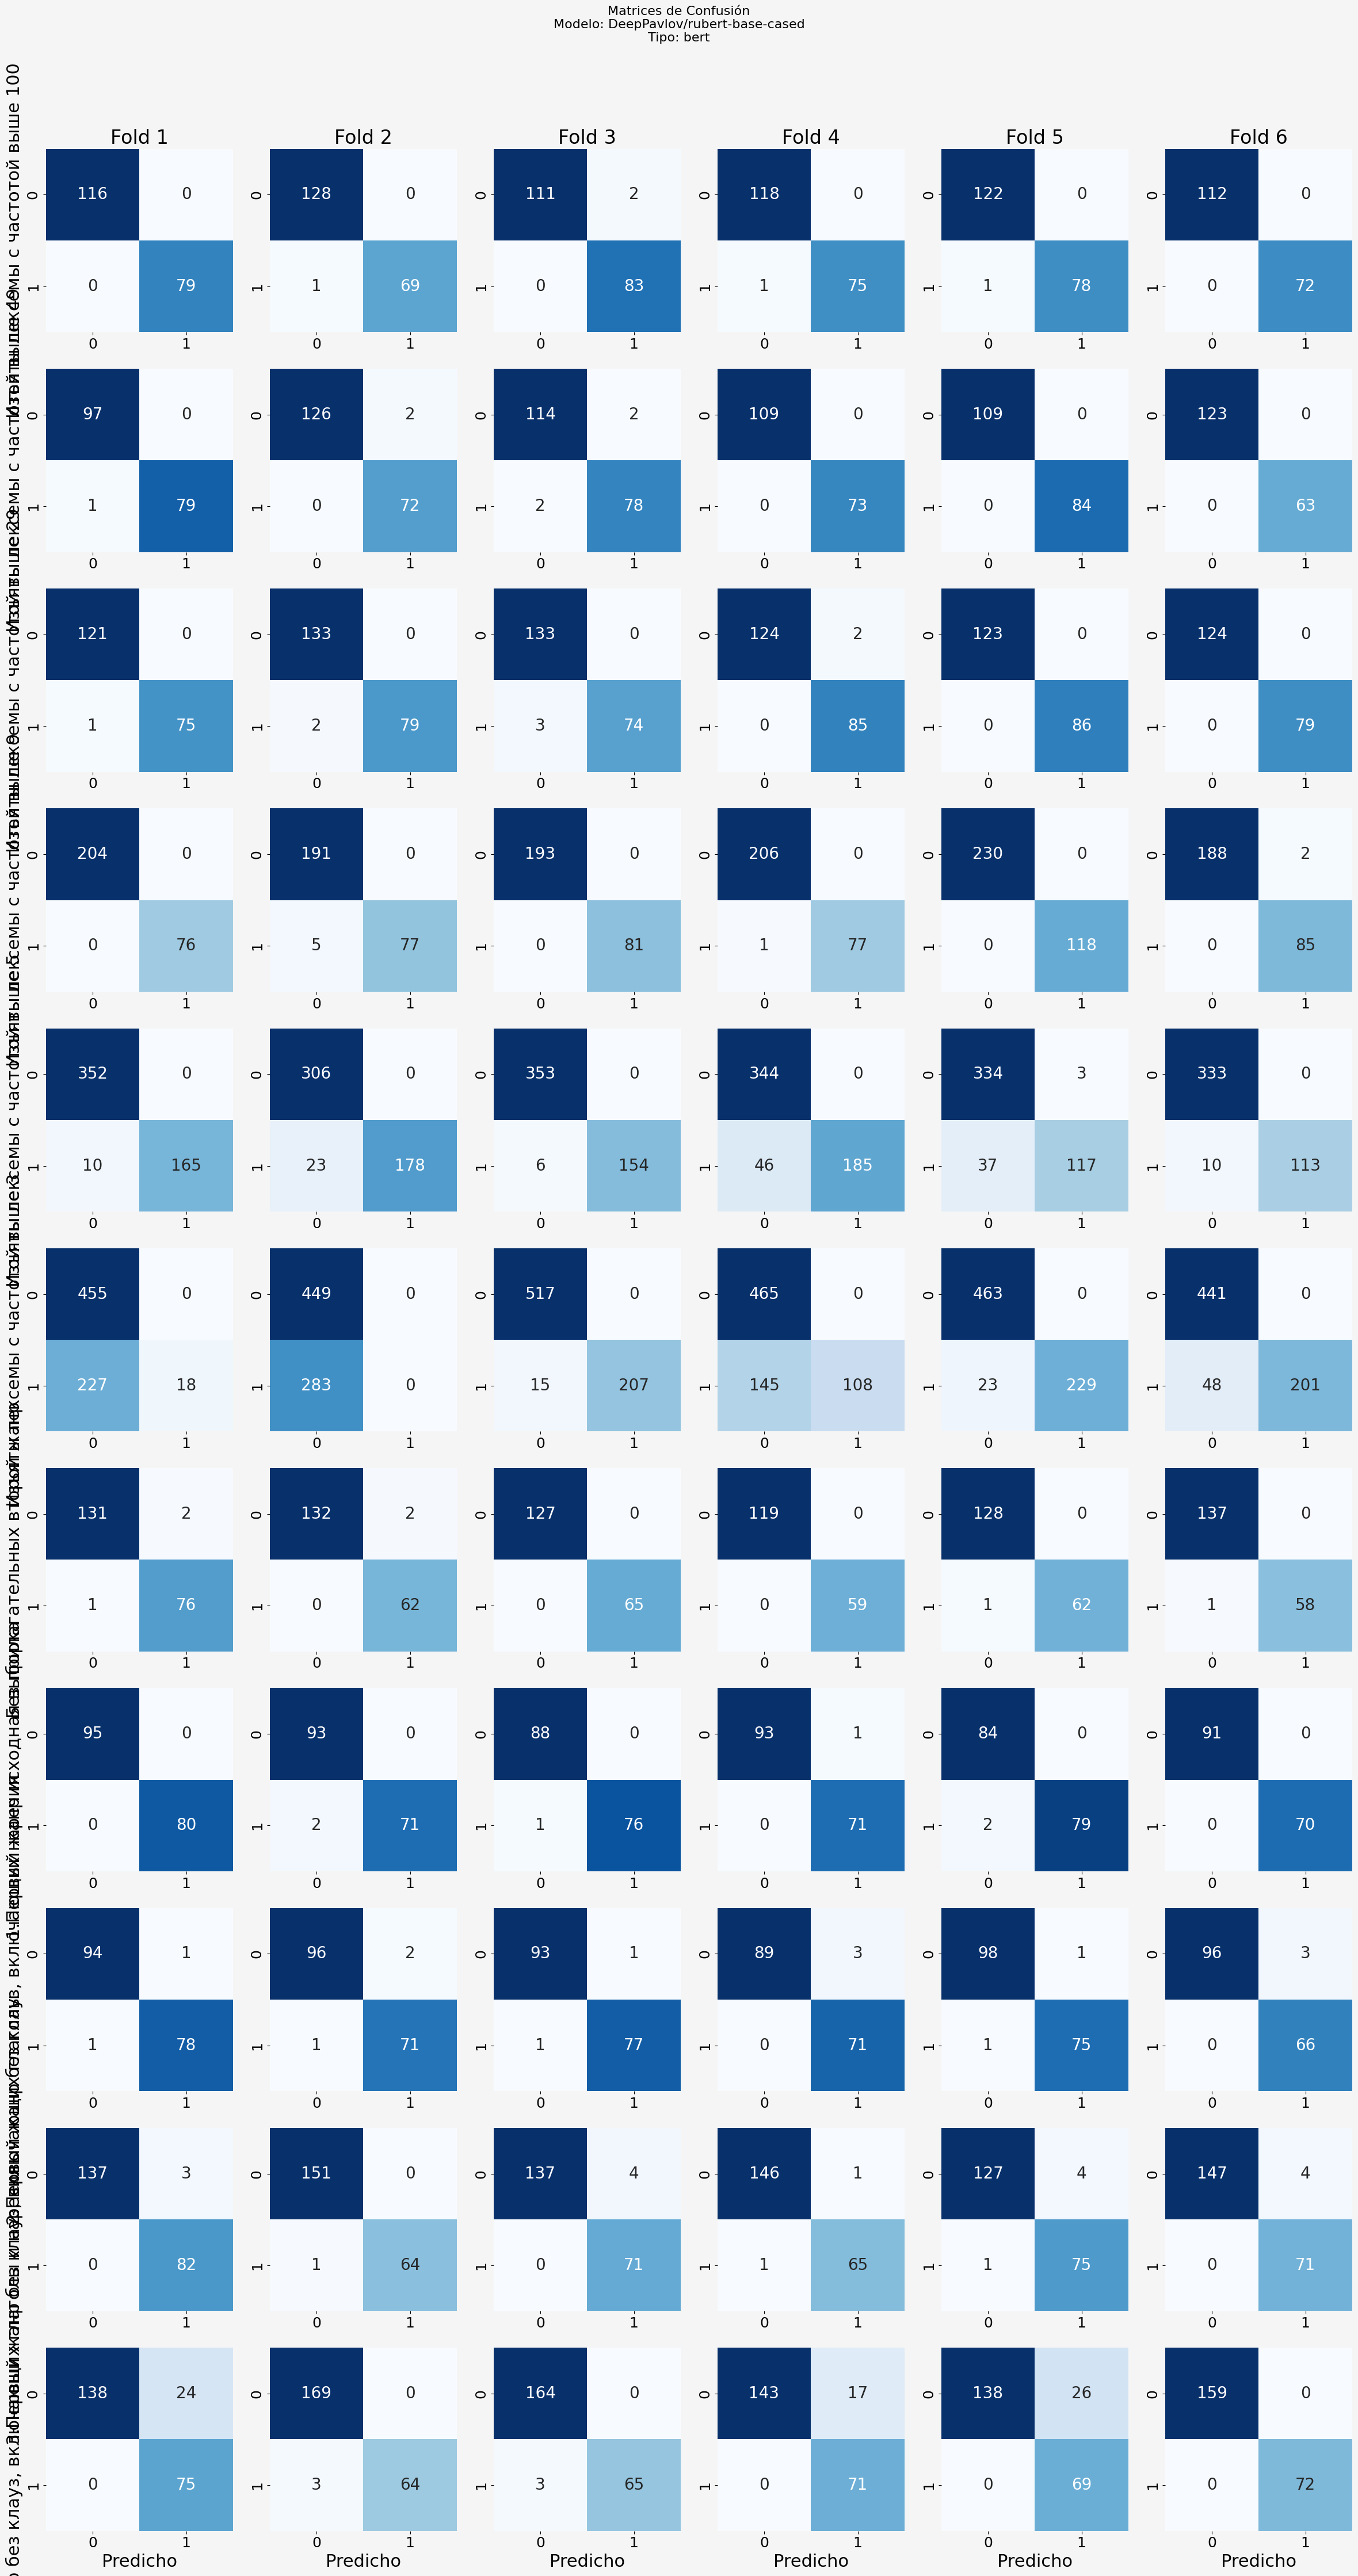

Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_gpt2.png
Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_facebook_opt-125m.png


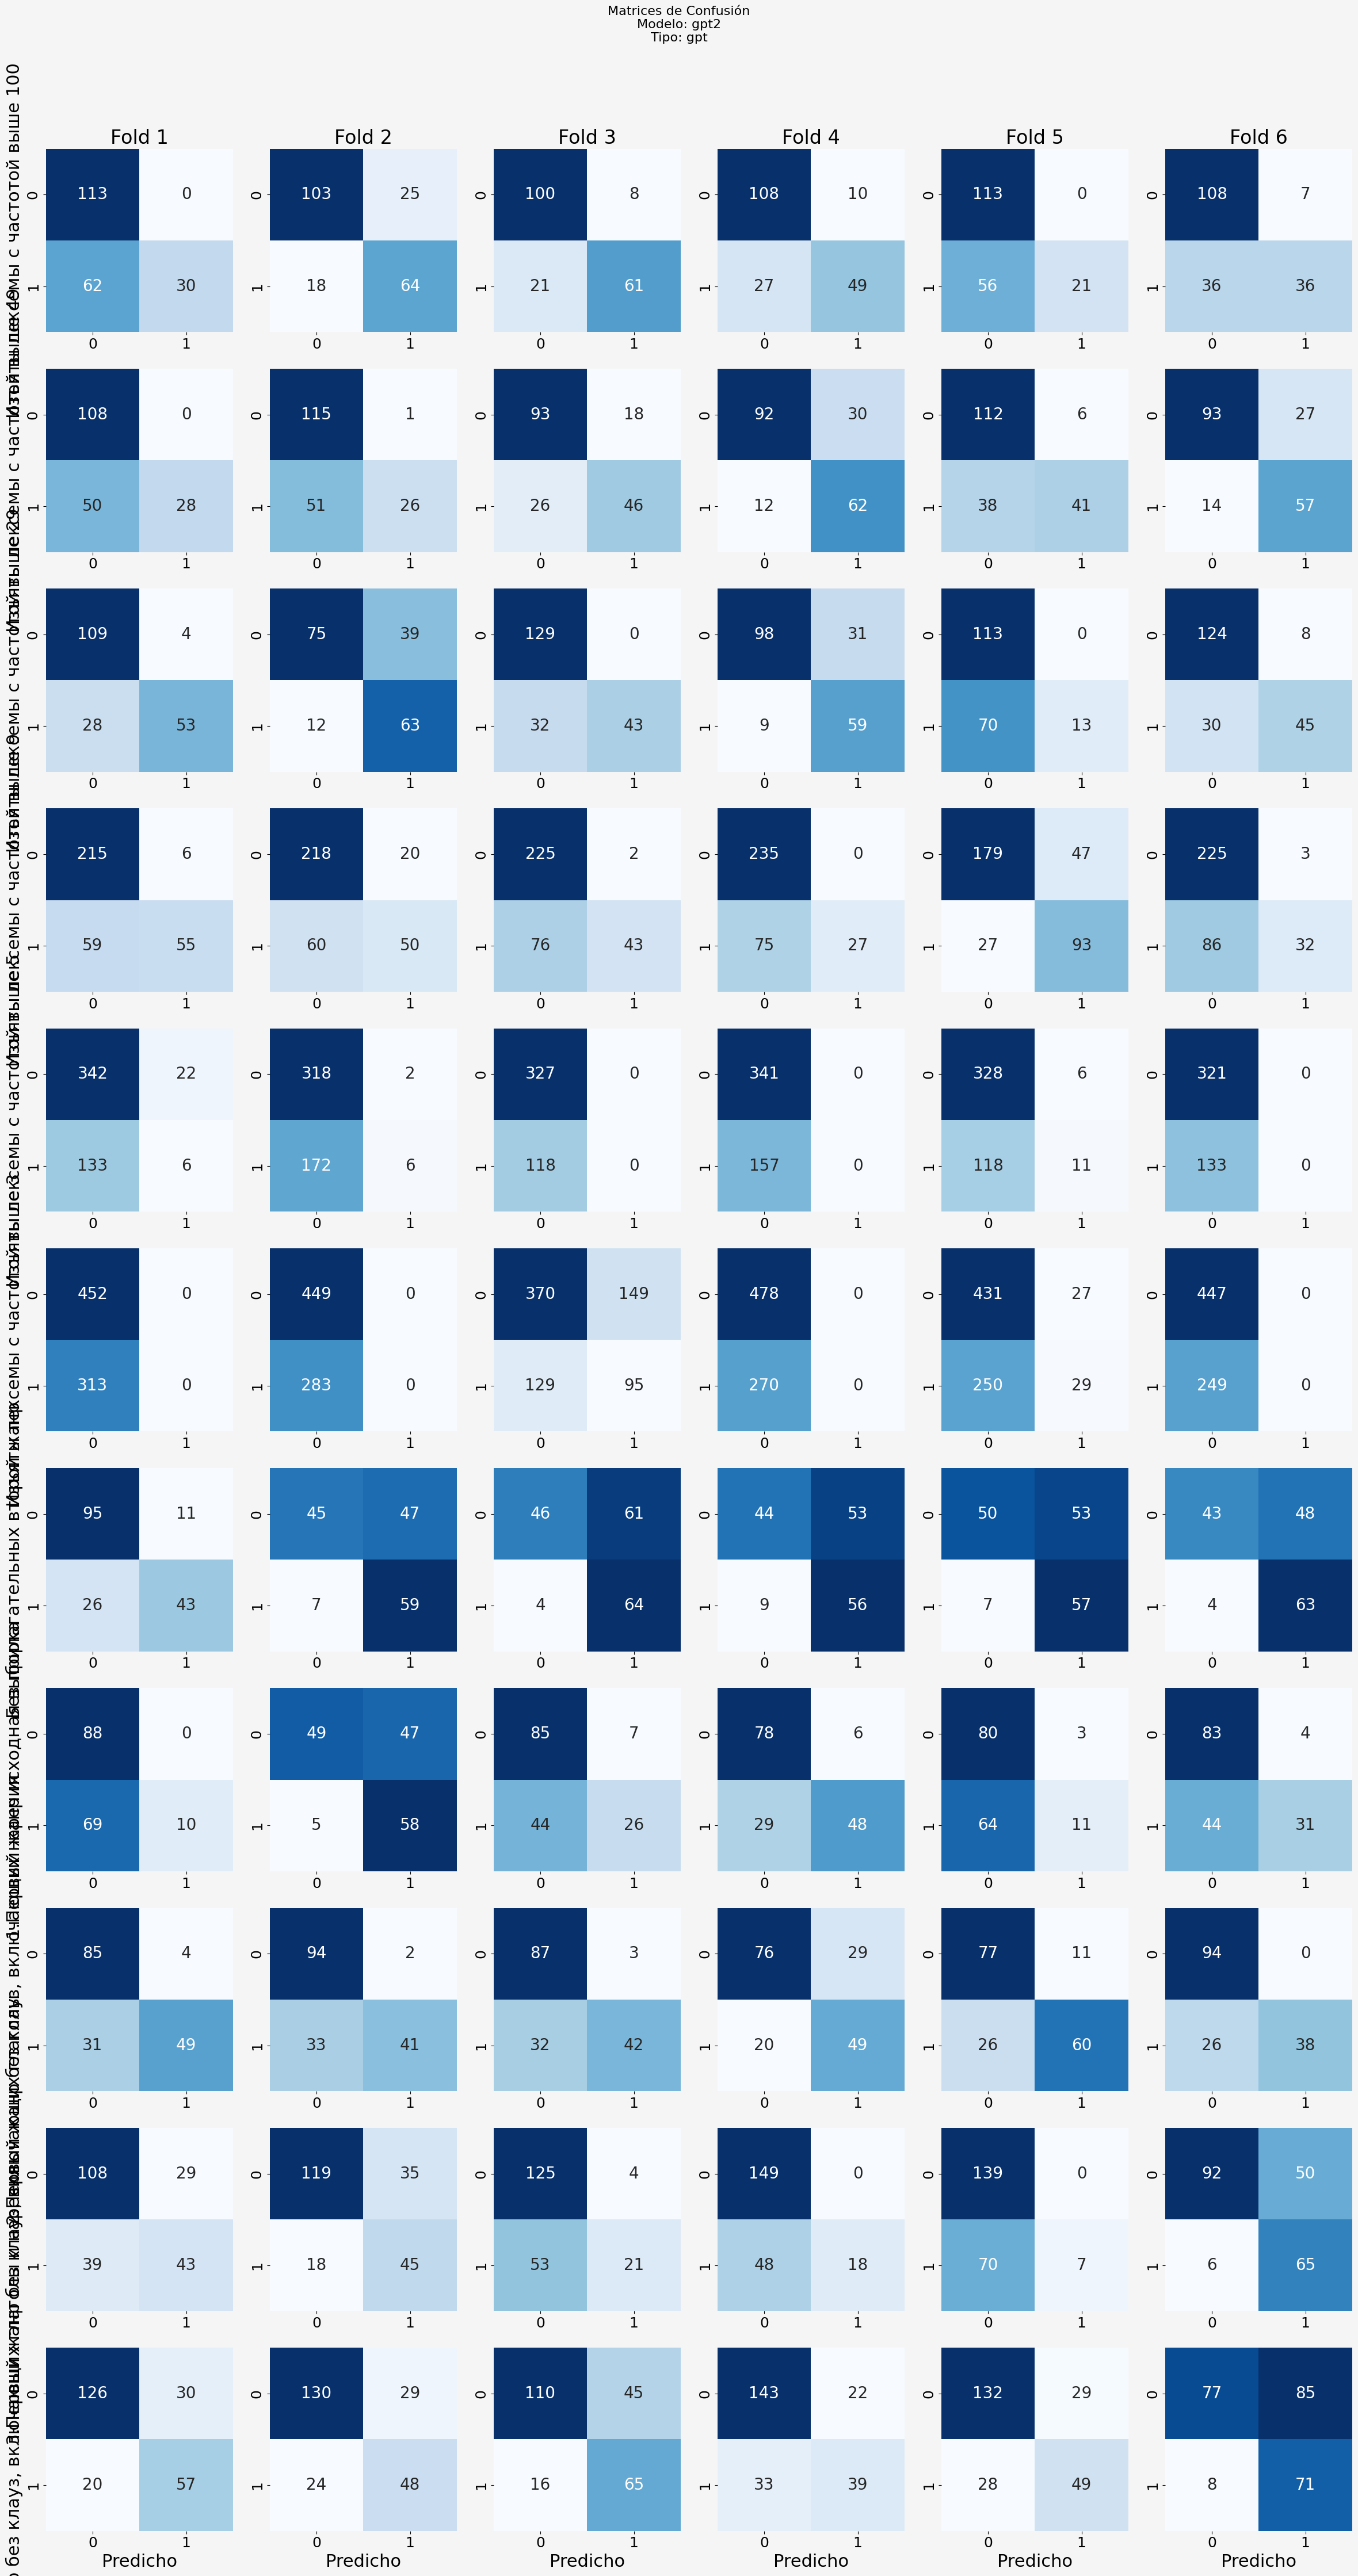

Guardado en: confusion_matrices_by_model_parallel/confusion_matrices_sberbank-ai_rugpt3small_based_on_gpt2.png


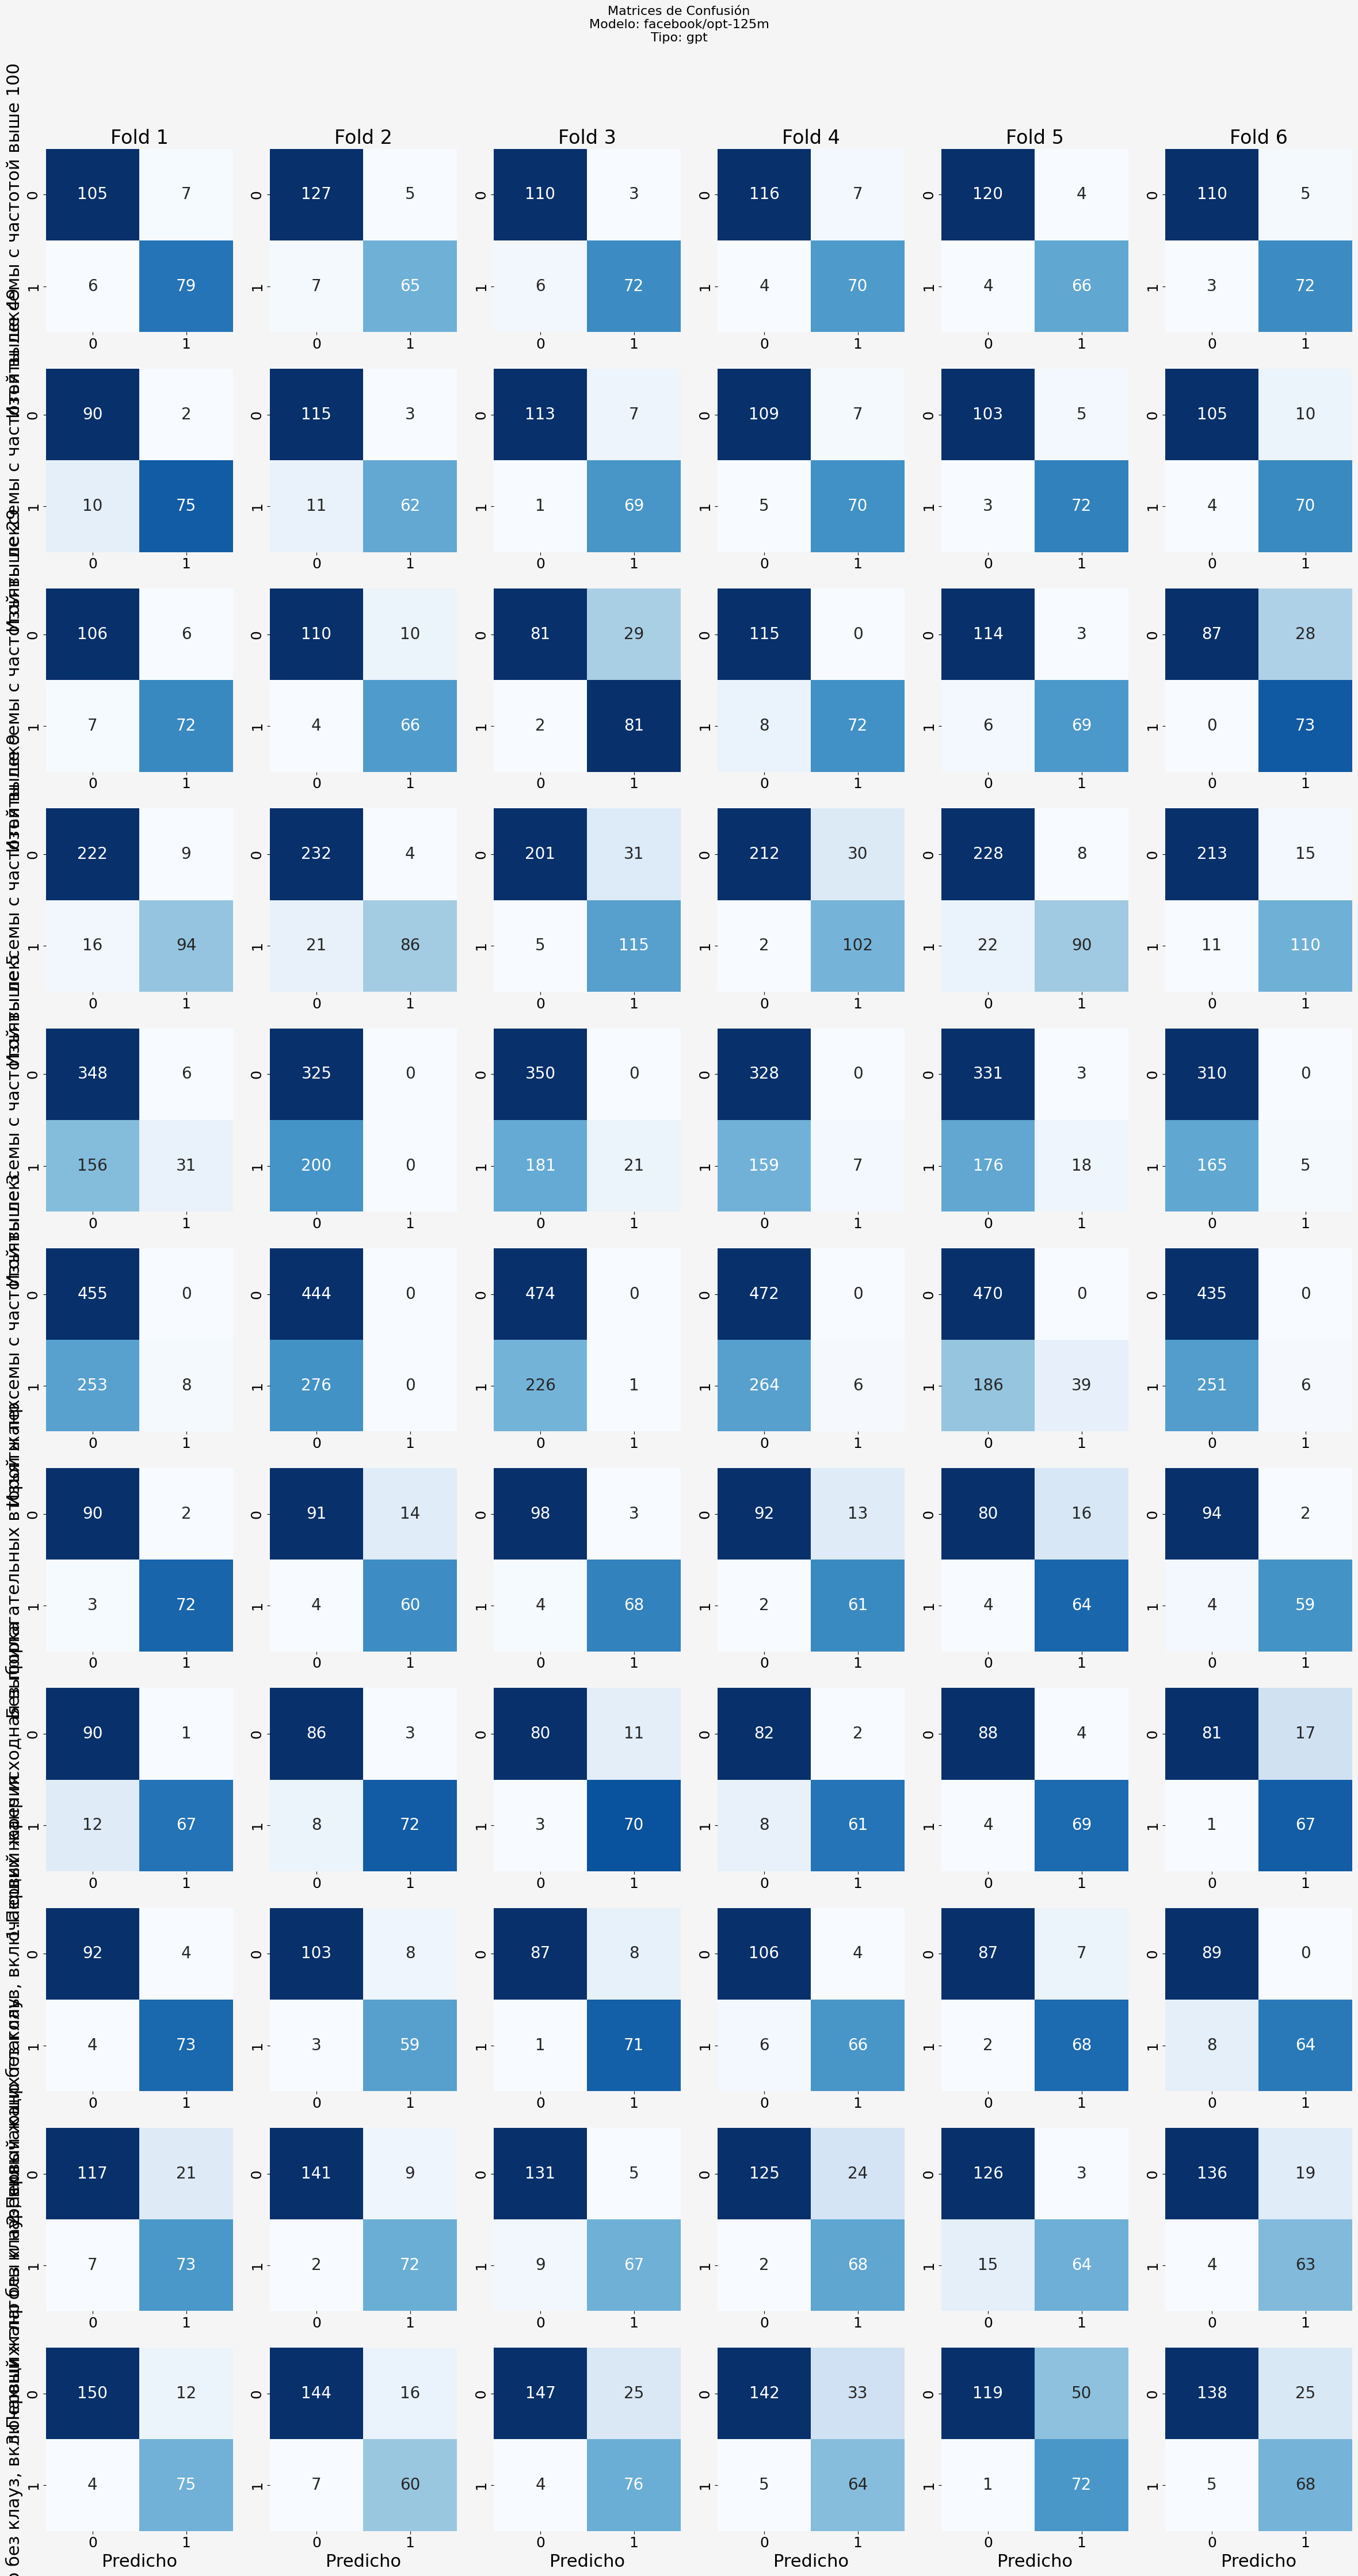

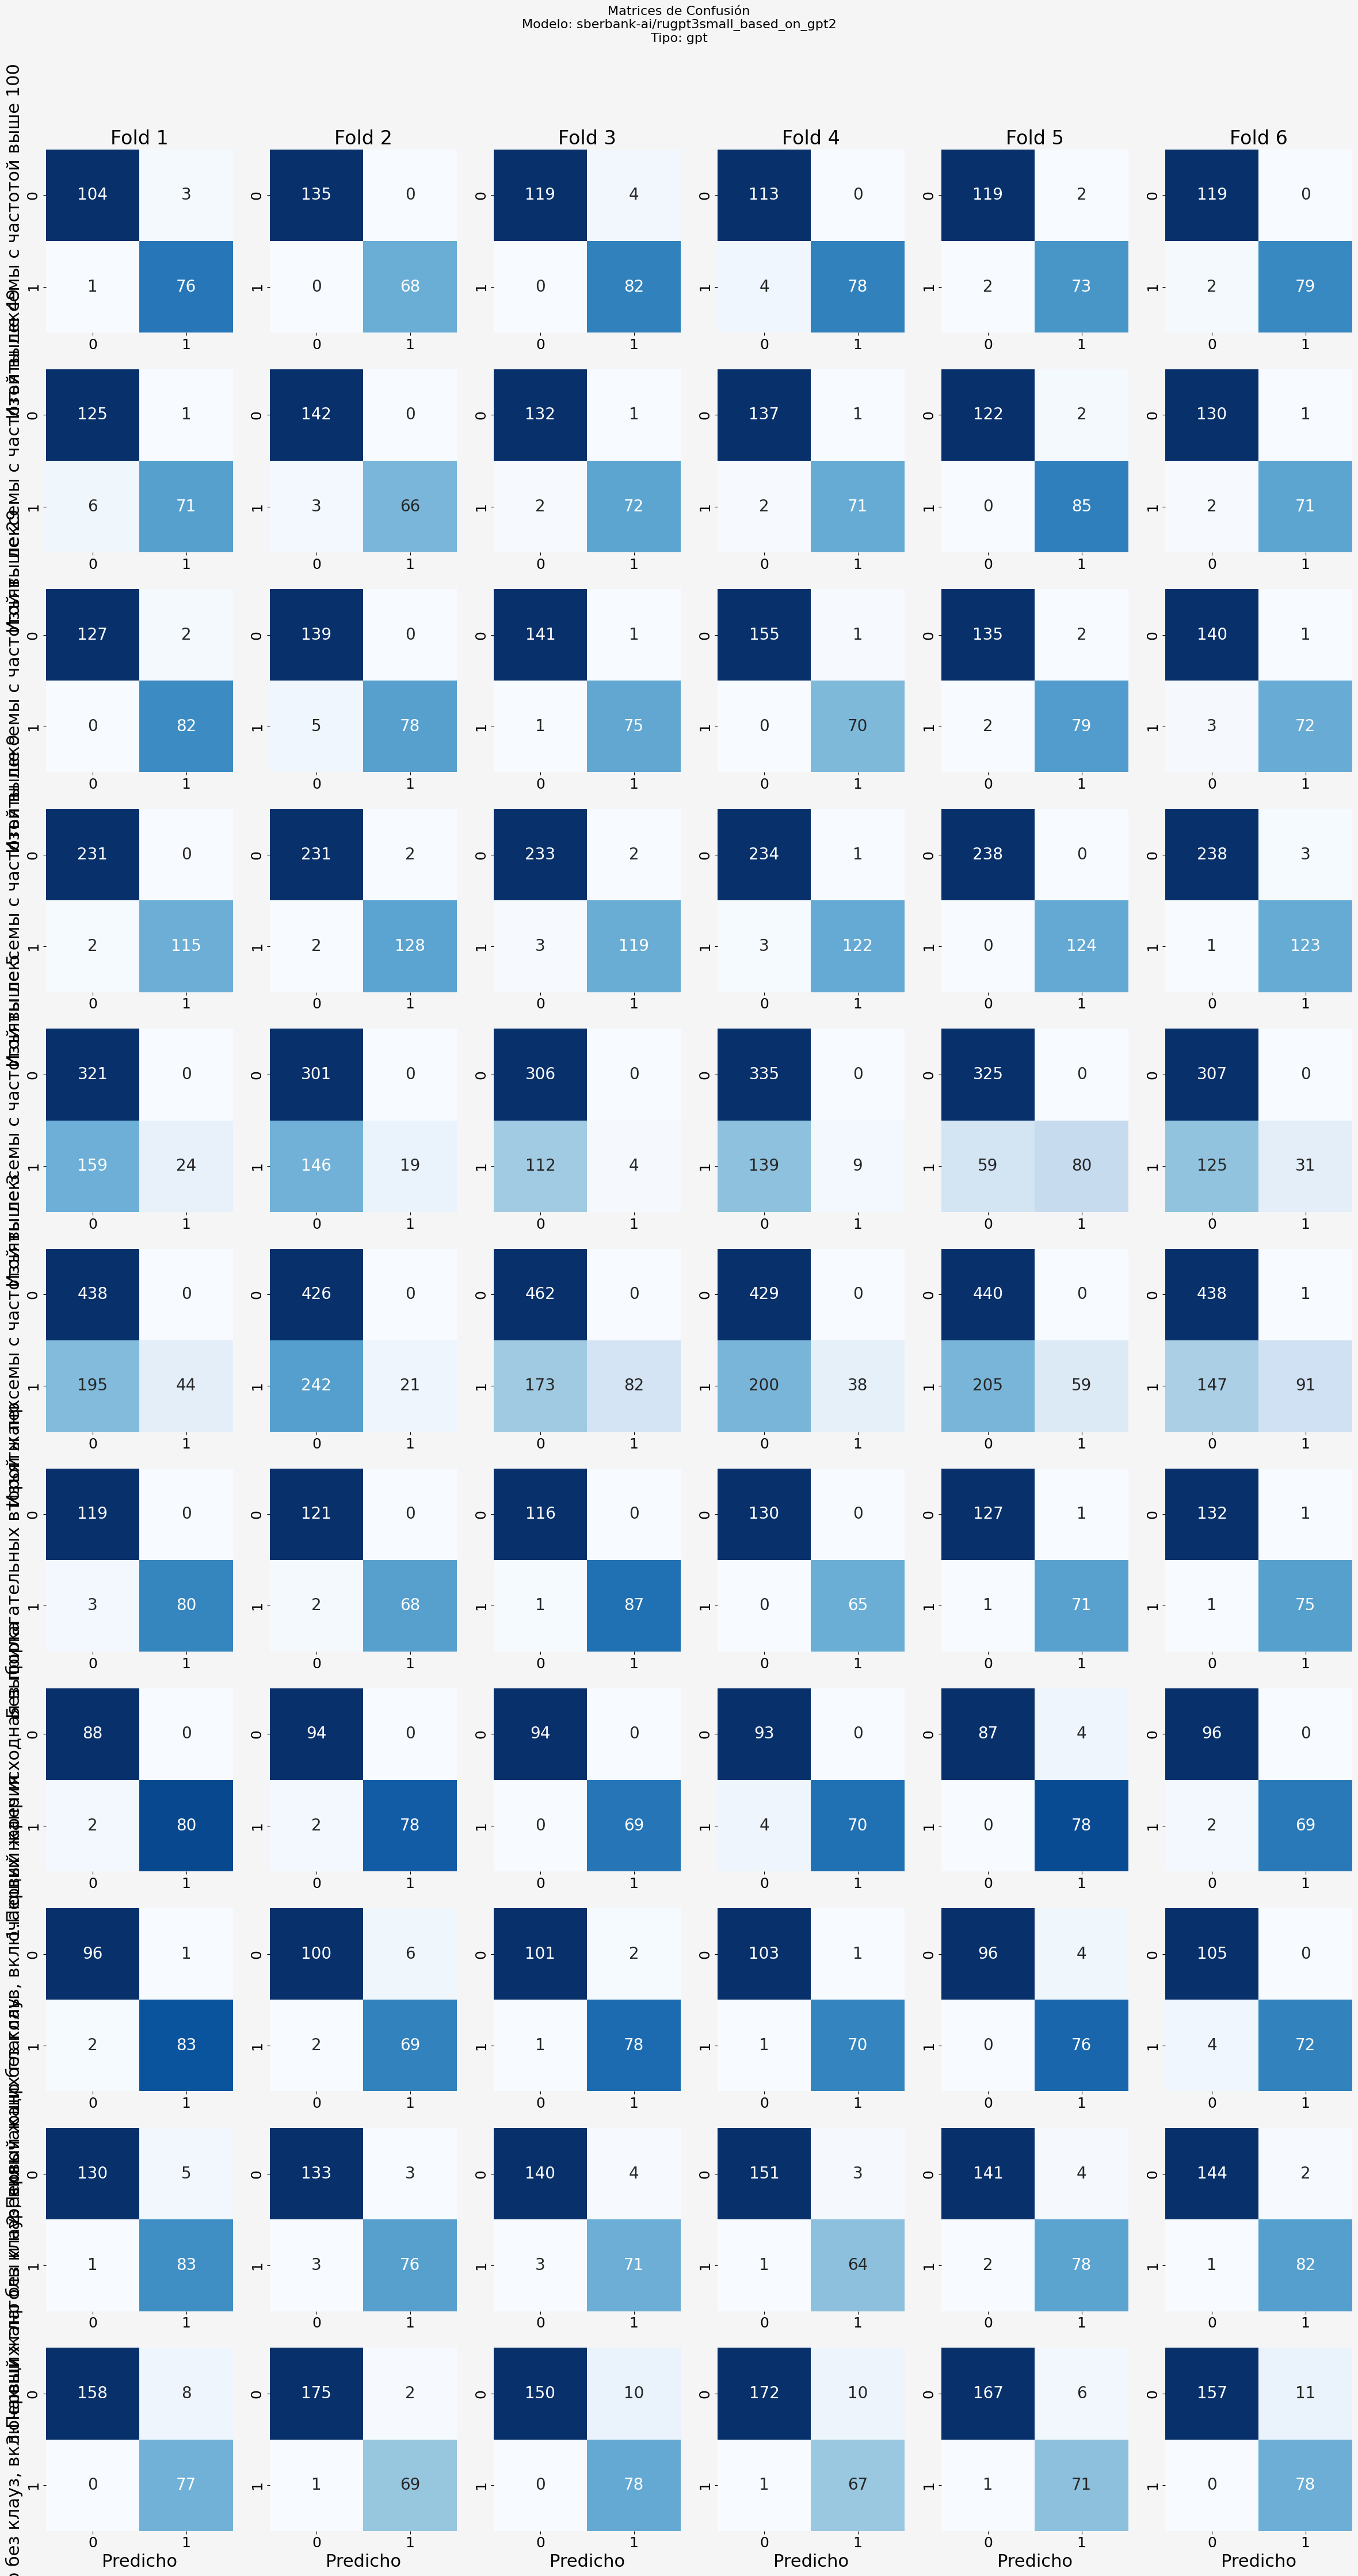


Procesamiento de todos los modelos completado.


In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import logging
from unidecode import unidecode
from concurrent.futures import ProcessPoolExecutor

# Configurar logging
logging.basicConfig(filename='plot_confusion_matrices.log', level=logging.ERROR,
                    format='%(asctime)s - %(message)s')

# Definir paleta de colores pastel
PASTEL_COLORS = [
    '#AEC6CF',  # Azul pastel
    '#FFB6C1',  # Rosa pastel
    '#98FF98',  # Verde pastel
    '#FFDAB9',  # Melocotón pastel
    '#E6E6FA',  # Lavanda pastel
    '#F0E68C',  # Amarillo pastel
    '#ADD8E6',  # Celeste pastel
    '#FFE4E1',  # Rosa suave pastel
    '#90EE90',  # Verde claro pastel
    '#FFFACD',  # Limón pastel
]

def _plot_single_model_confusion_matrices(model, df, output_dir, model_colors, show_plots):
    """Función auxiliar para procesar y graficar las matrices de confusión de un solo modelo."""
    print(f"\nProcesando modelo: {model}")

    # Filtrar resultados para este modelo
    model_results = df[df['model_name'] == model]
    num_datasets = len(model_results)

    # Determinar el número máximo de folds (matrices) para este modelo
    max_folds = max(len(res['confusion_matrices']) for res in model_results.to_dict('records'))

    # Configurar figura
    fig, axes = plt.subplots(nrows=num_datasets,
                             ncols=max_folds,
                             figsize=(4 * max_folds, 4 * num_datasets))

    # Ajustar título general
    model_type = model_results.iloc[0]['type']
    fig.suptitle(f"Matrices de Confusión\nModelo: {model}\nTipo: {model_type}",
                 fontsize=16, y=1.02)

    # Obtener color pastel para el modelo
    pastel_color = model_colors[model]

    # Ajustar axes para un solo dataset
    if num_datasets == 1:
        axes = np.array([axes])

    # Iterar sobre cada dataset para este modelo
    for row_idx, (_, row) in enumerate(model_results.iterrows()):
        dataset_name = row['dataset_name']
        dataset_type = row['type']
        conf_matrices = row['confusion_matrices']
        num_folds = len(conf_matrices)

        # Graficar cada fold para este dataset
        for col_idx in range(max_folds):
            ax = axes[row_idx, col_idx] if num_datasets > 1 else axes[0, col_idx]

            if col_idx < num_folds:
                # Establecer color de fondo del subgráfico
                ax.set_facecolor(pastel_color)

                # Graficar matriz de confusión
                sns.heatmap(np.array(conf_matrices[col_idx]),
                            annot=True,
                            fmt="d",
                            cmap="Blues",
                            cbar=False,
                            ax=ax)

                # Configurar título solo en la primera fila
                if row_idx == 0:
                    ax.set_title(f"Fold {col_idx + 1}")

                # Configurar etiquetas en el eje Y (izquierda) para cada fila con dataset_name y type
                if col_idx == 0:
                    label = f"{dataset_name[:]}" if len(dataset_name) > 20 else f"{dataset_name} ({dataset_type})"
                    ax.set_ylabel(label)

                # Etiquetas de ejes X (abajo) solo en la última fila
                ax.set_xlabel("Predicho" if row_idx == num_datasets - 1 else "")
                # Ya no necesitamos la etiqueta "Real" en cada columna, la etiqueta del dataset en el eje Y es suficiente contexto.
                # ax.set_ylabel("Real" if col_idx == 0 else "")
            else:
                # Ocultar ejes si no hay datos
                ax.axis('off')

    # Establecer color de fondo de la figura (neutro)
    fig.patch.set_facecolor('#F5F5F5')  # Gris claro
    plt.tight_layout()

    # Guardar imagen
    safe_model_name = unidecode(model.replace('/', '_').replace(' ', '_')[:50])
    output_path = os.path.join(output_dir, f"plots/confusion_matrices_{safe_model_name}_Step_8.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=150)
    print(f"Guardado en: {output_path}")

    # Mostrar figura si show_plots es True
    if show_plots:
        plt.show()

    plt.close(fig)  # Cerrar figura para liberar memoria

def plot_confusion_matrices_by_model_parallel(json_file='resultados_completos_models_datasets.json',
                                             output_dir='confusion_matrices_by_model_parallel',
                                             show_plots=False,
                                             num_workers=4):
    """
    Genera imágenes por modelo paralelizando el procesamiento de cada modelo.

    Args:
        json_file: Ruta al archivo JSON con los resultados
        output_dir: Directorio de salida para las imágenes
        show_plots: Si se muestran los gráficos interactivamente
        num_workers: Número de procesos a utilizar para la paralelización
    """
    # Cargar resultados desde el JSON
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            results = json.load(f)
    except Exception as e:
        print(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        logging.error(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        return

    # Convertir a DataFrame
    df = pd.DataFrame(results)

    # Verificar columnas necesarias
    required_columns = ['model_name', 'dataset_name', 'confusion_matrices', 'type']
    if not all(col in df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in df.columns]
        print(f"Error: El DataFrame no contiene las columnas necesarias: {missing_cols}")
        print(f"Columnas disponibles: {list(df.columns)}")
        logging.error(f"Columnas faltantes: {missing_cols}. Columnas disponibles: {list(df.columns)}")
        return

    # Obtener modelos únicos y asignar colores pastel
    unique_models = df['model_name'].unique()
    model_colors = {model: PASTEL_COLORS[i % len(PASTEL_COLORS)] for i, model in enumerate(unique_models)}
    print("Asignación de colores por modelo:")
    for model, color in model_colors.items():
        print(f"  {model}: {color}")

    print(f"Modelos encontrados: {len(unique_models)}")

    # Crear directorio de salida
    os.makedirs(output_dir, exist_ok=True)

    # Paralelizar el procesamiento de los modelos
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(_plot_single_model_confusion_matrices, model, df, output_dir, model_colors, show_plots) for model in unique_models]
        for future in futures:
            future.result()  # Esperar a que cada tarea termine (y capturar cualquier excepción)

    print("\nProcesamiento de todos los modelos completado.")

# Ejemplo de uso con paralelización (usando 4 procesos)
plot_confusion_matrices_by_model_parallel(show_plots=True, num_workers=4)

Encontrados 7 modelos únicos.

Procesando modelo: DeepPavlov/rubert-base-cased
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_DeepPavlov_rubert-base-cased.png


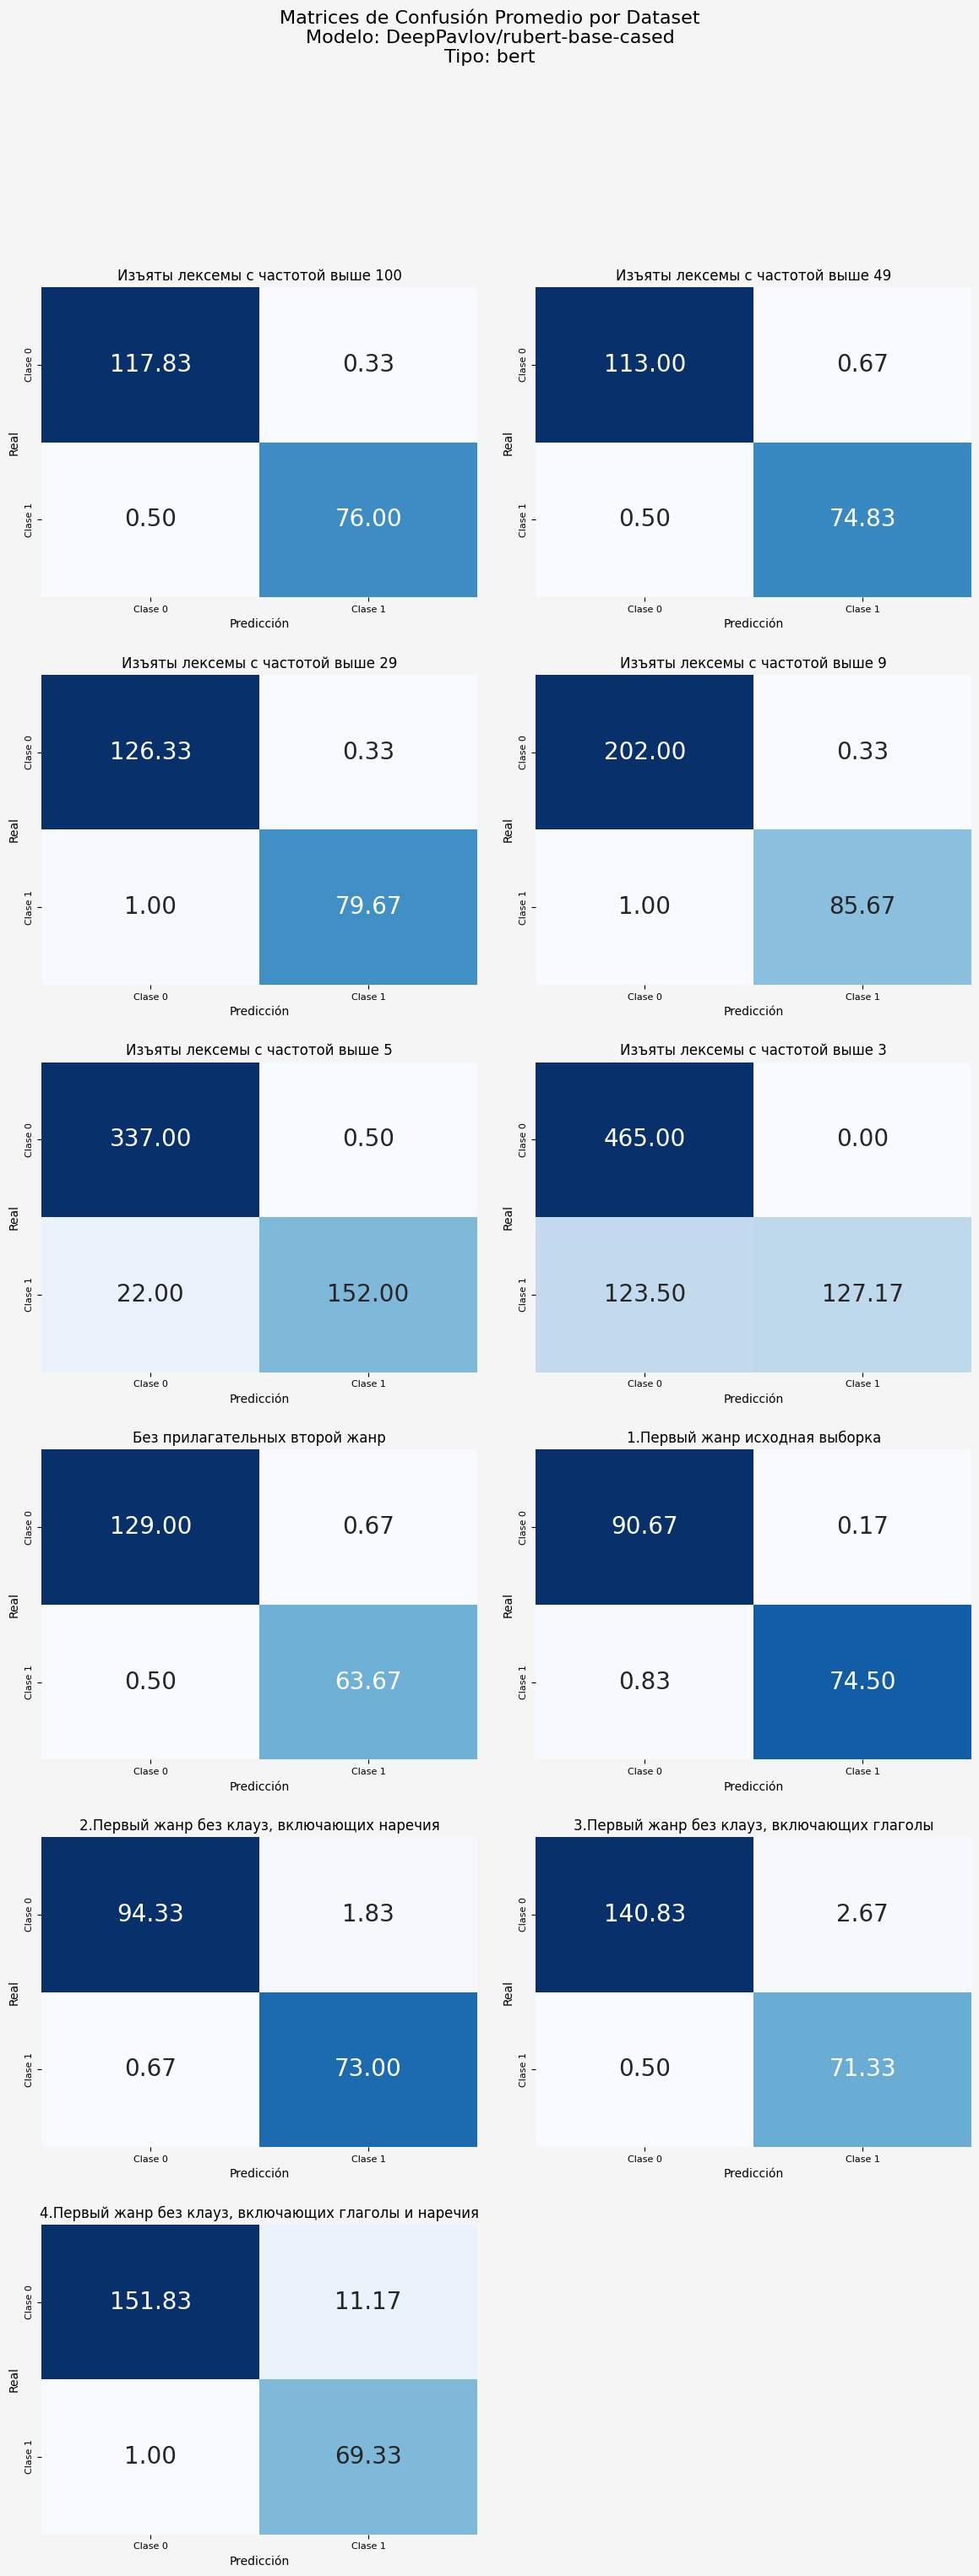


Procesando modelo: bert-base-multilingual-cased
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_bert-base-multilingual-cased.png


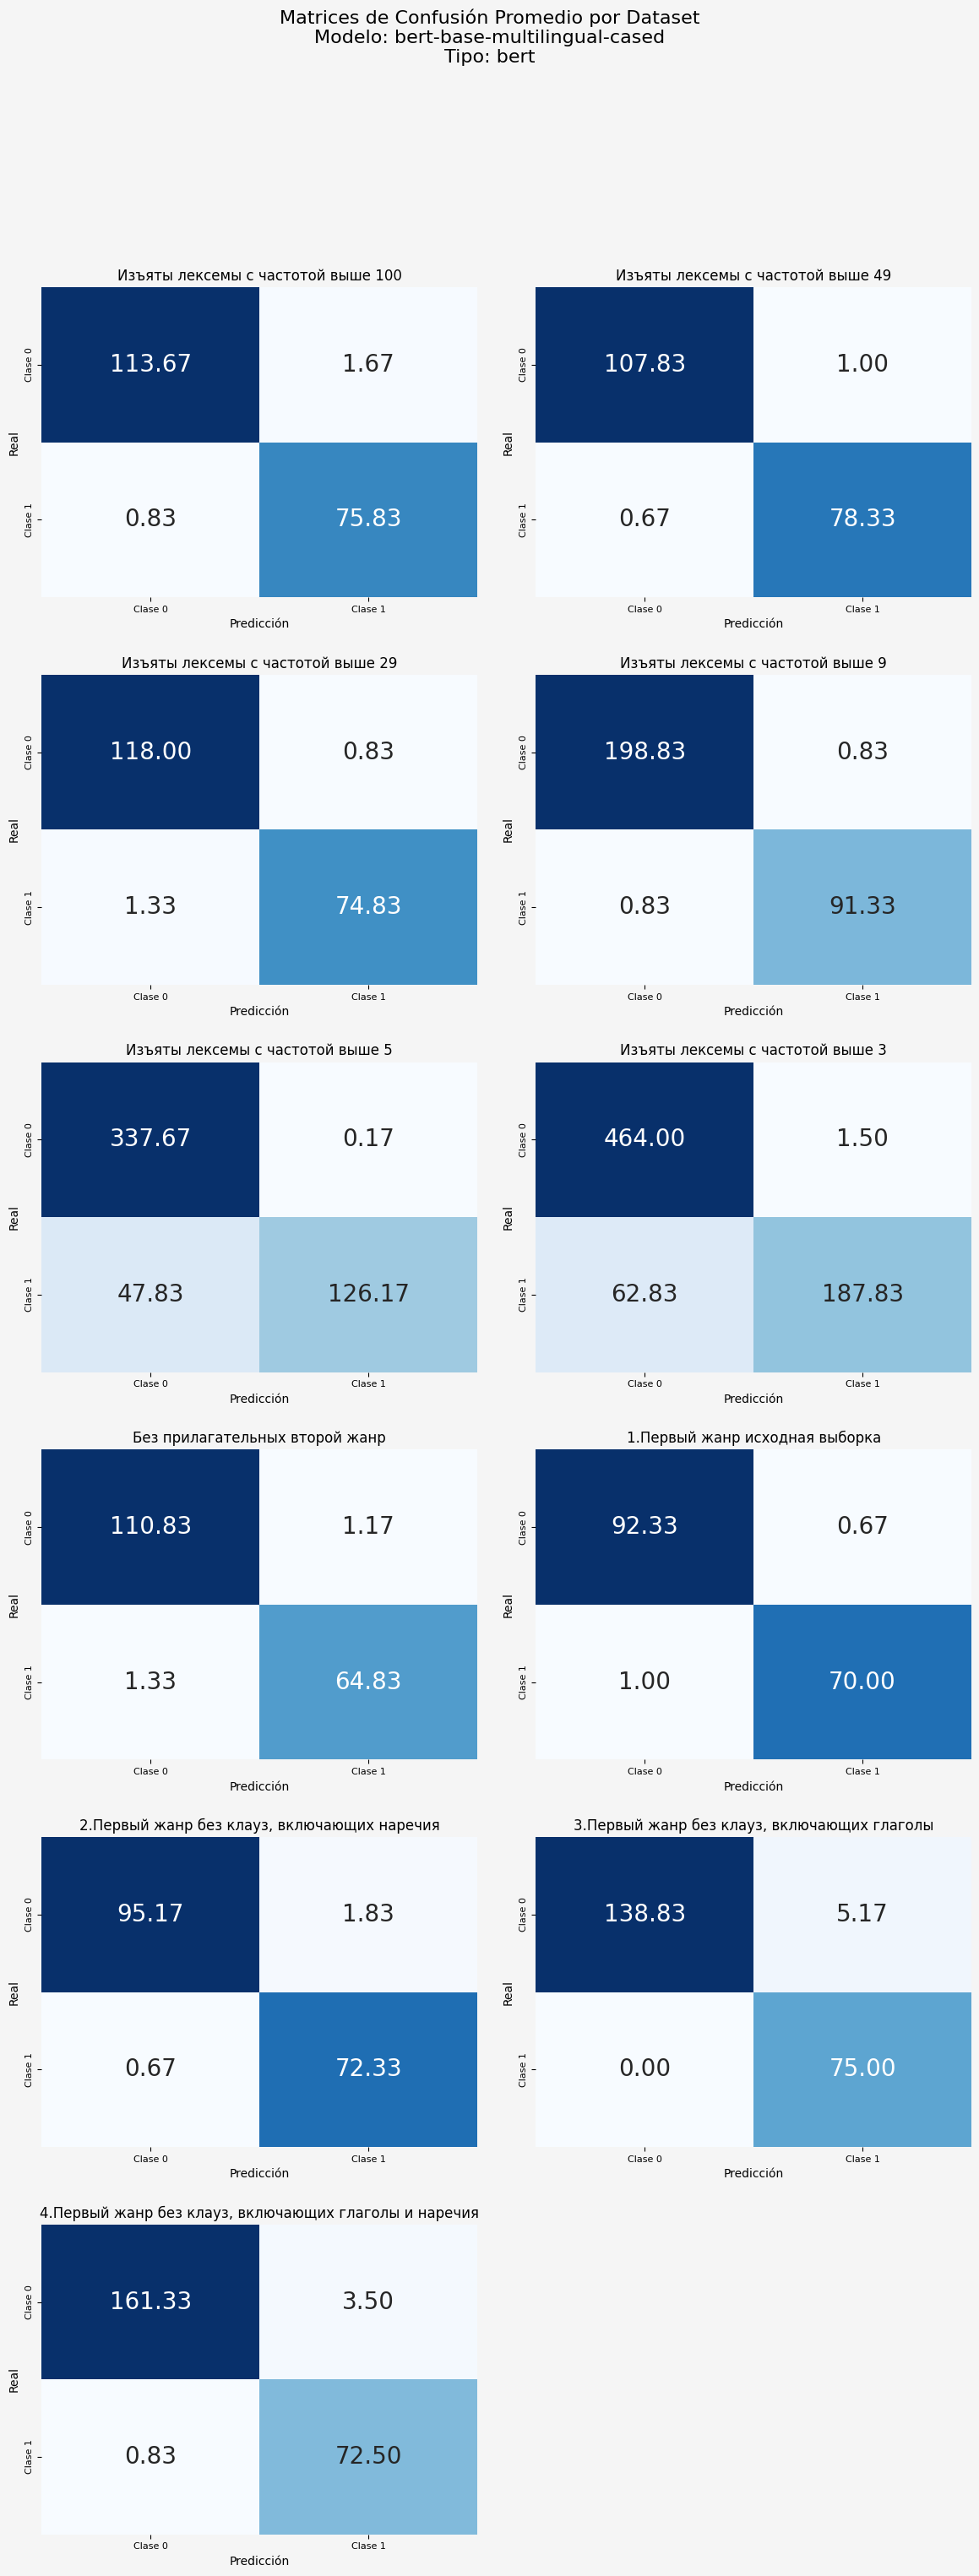


Procesando modelo: distilbert-base-multilingual-cased
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_distilbert-base-multilingual-cased.png


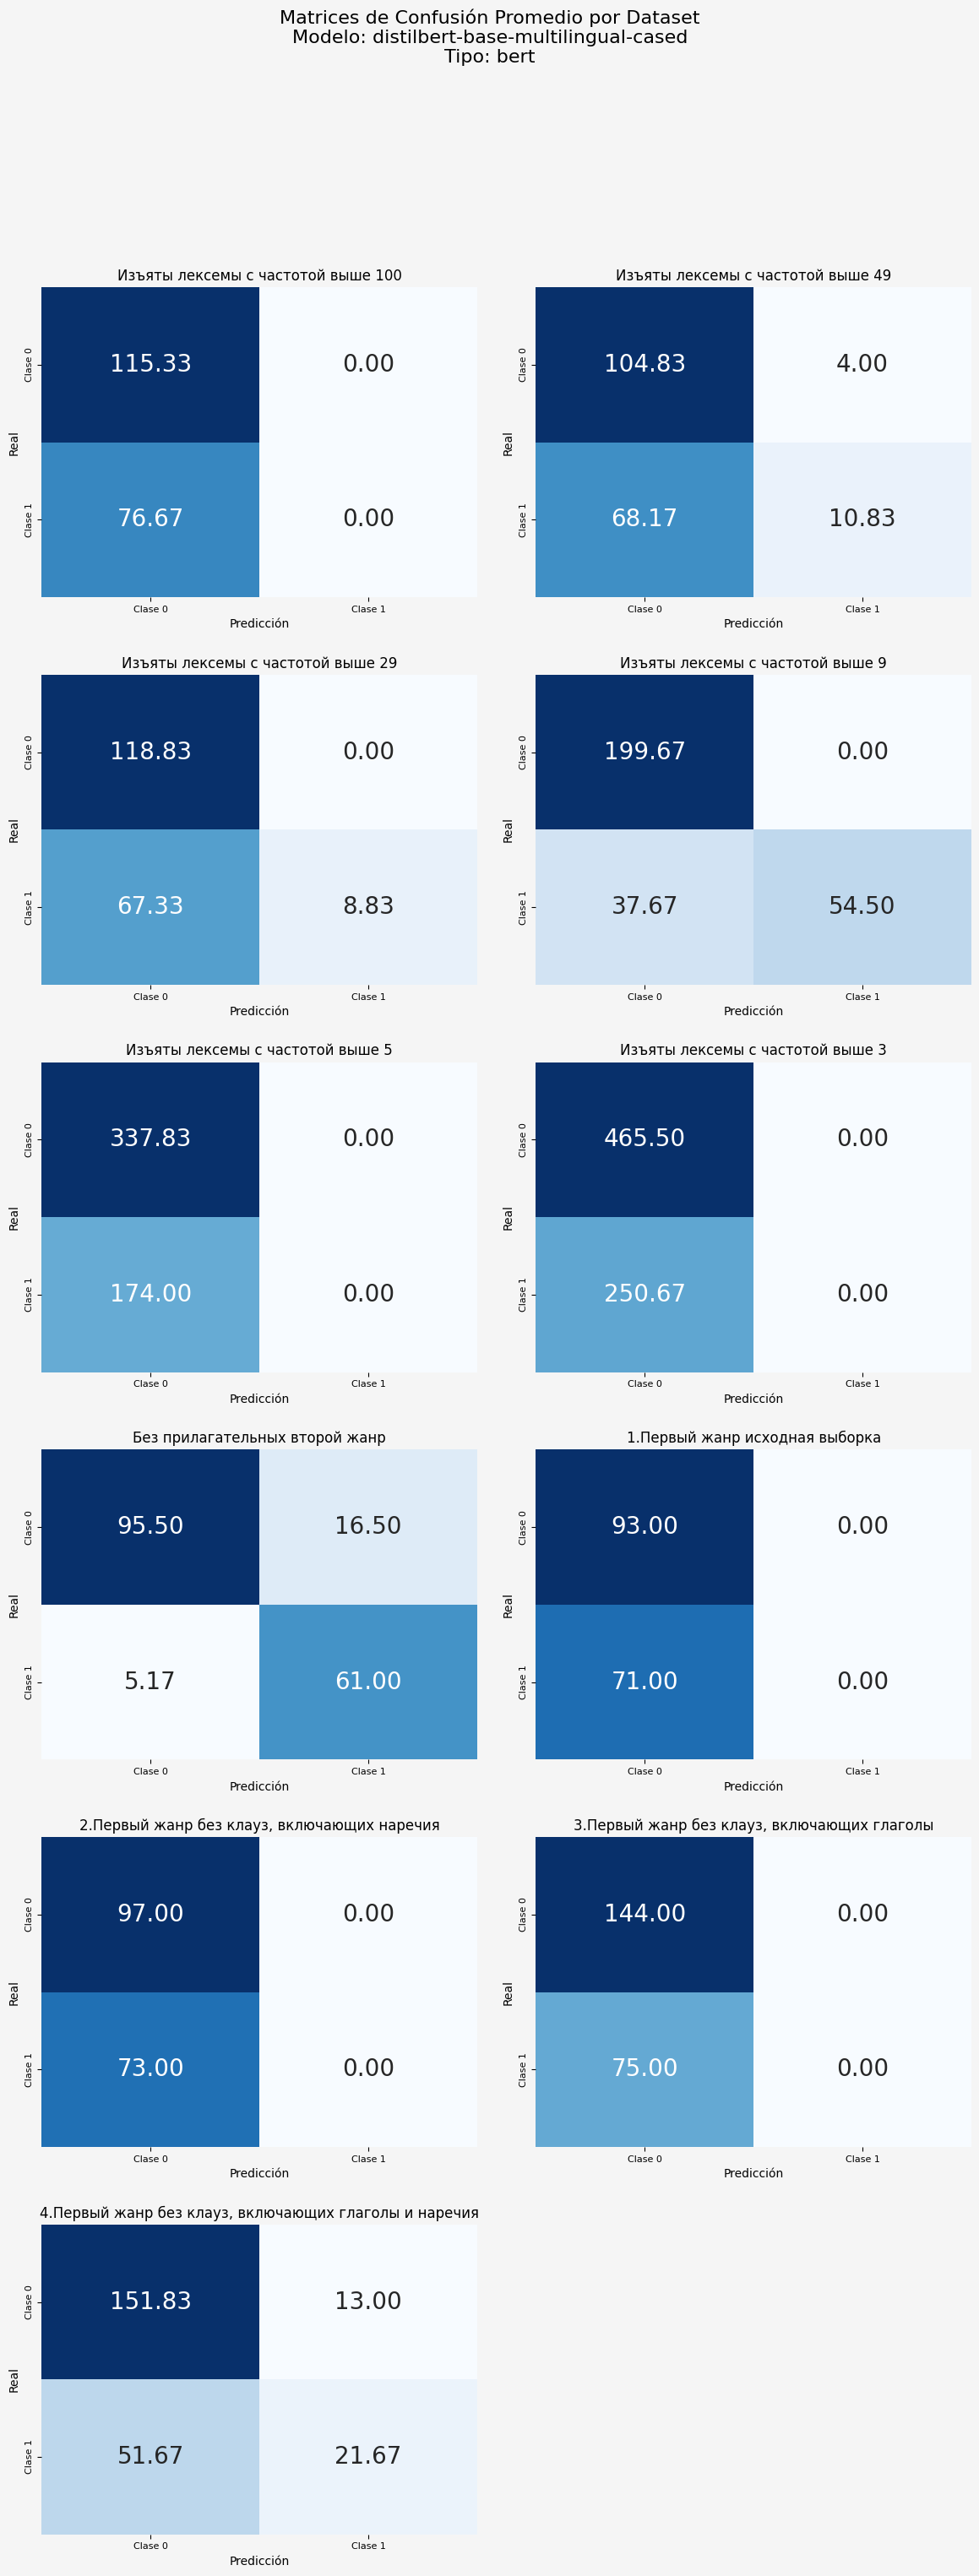


Procesando modelo: roberta-base
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_roberta-base.png


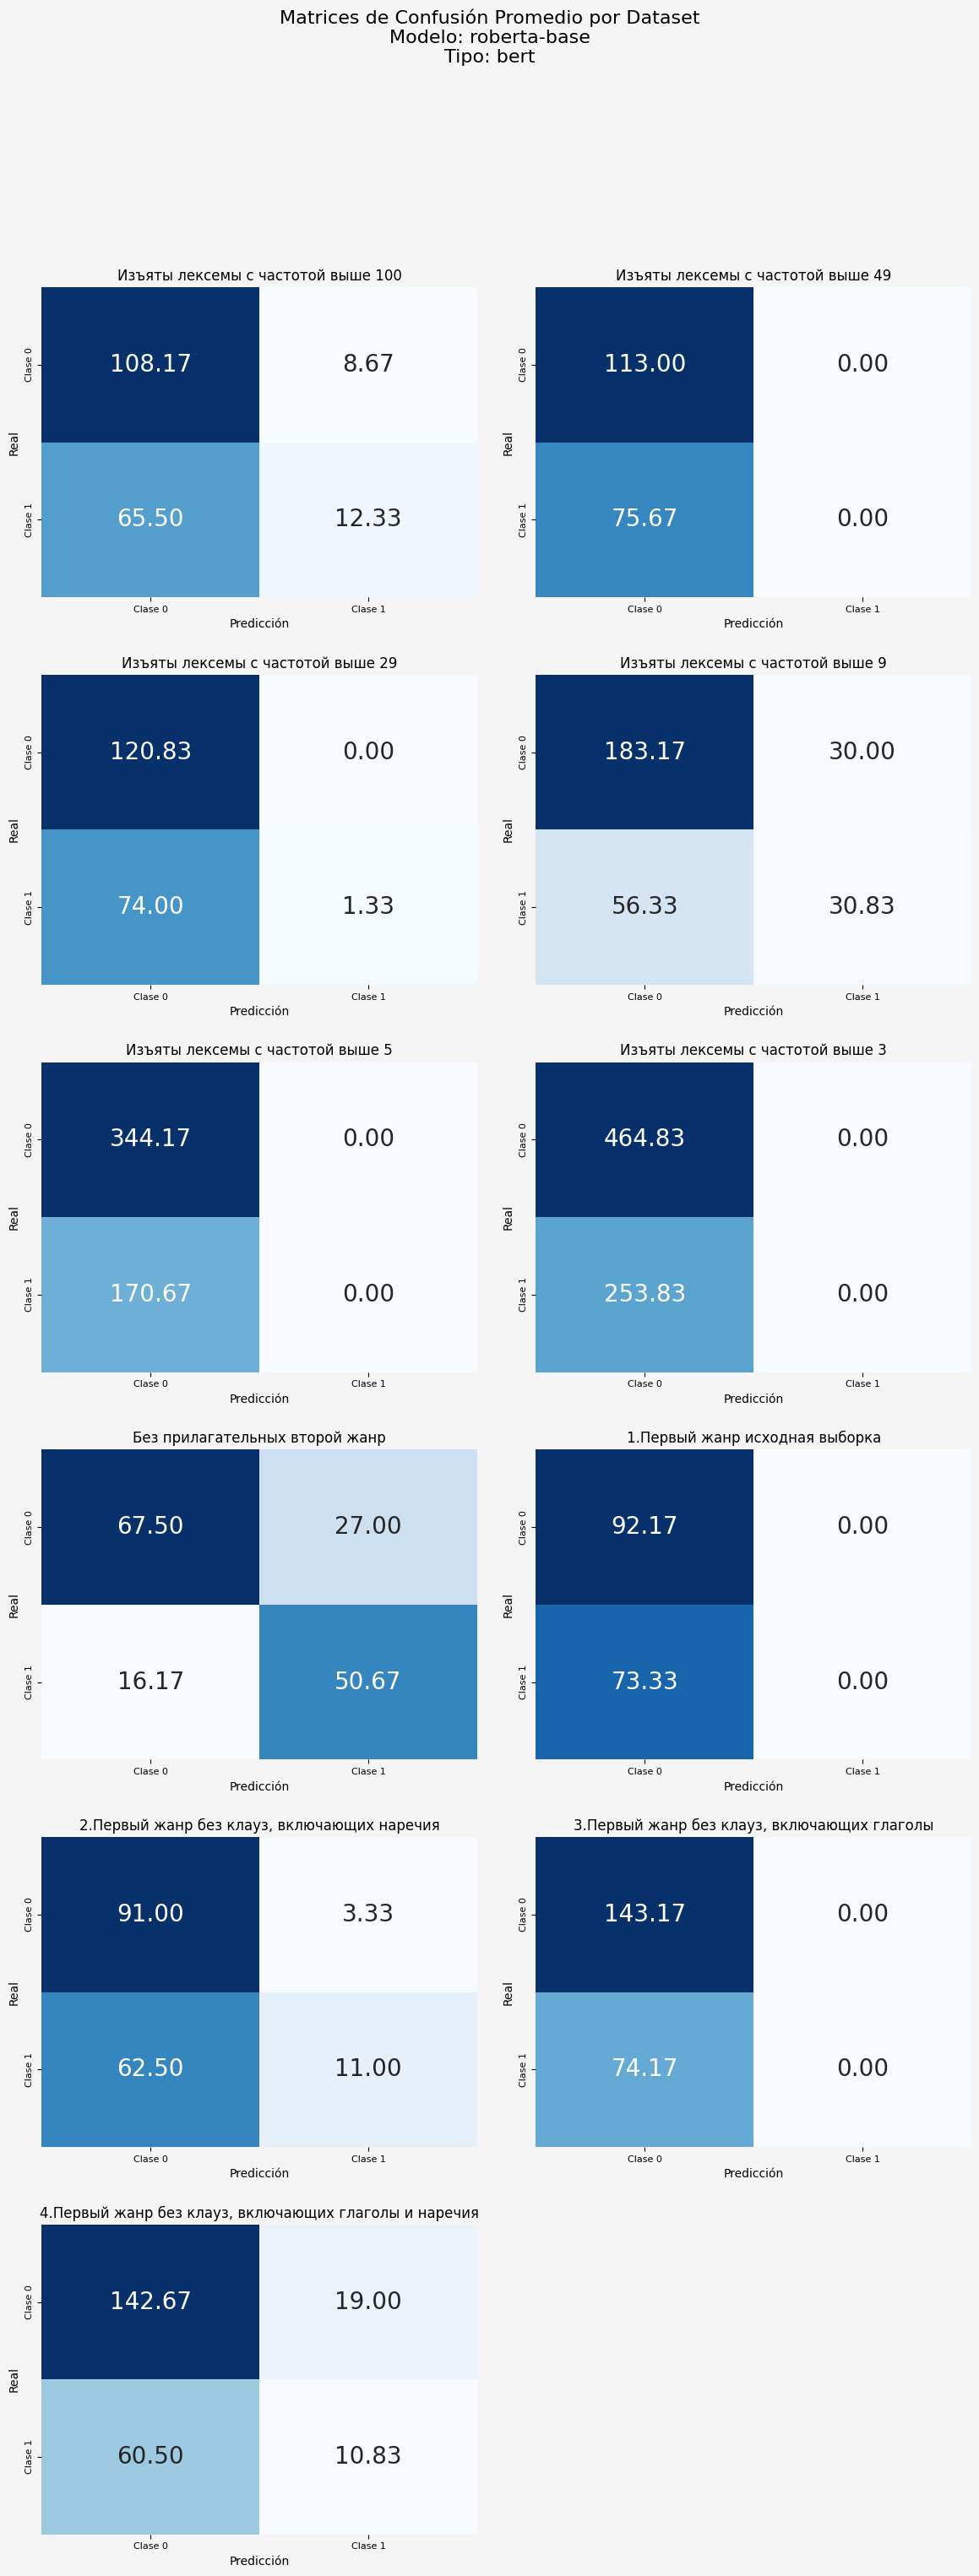


Procesando modelo: gpt2
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_gpt2.png


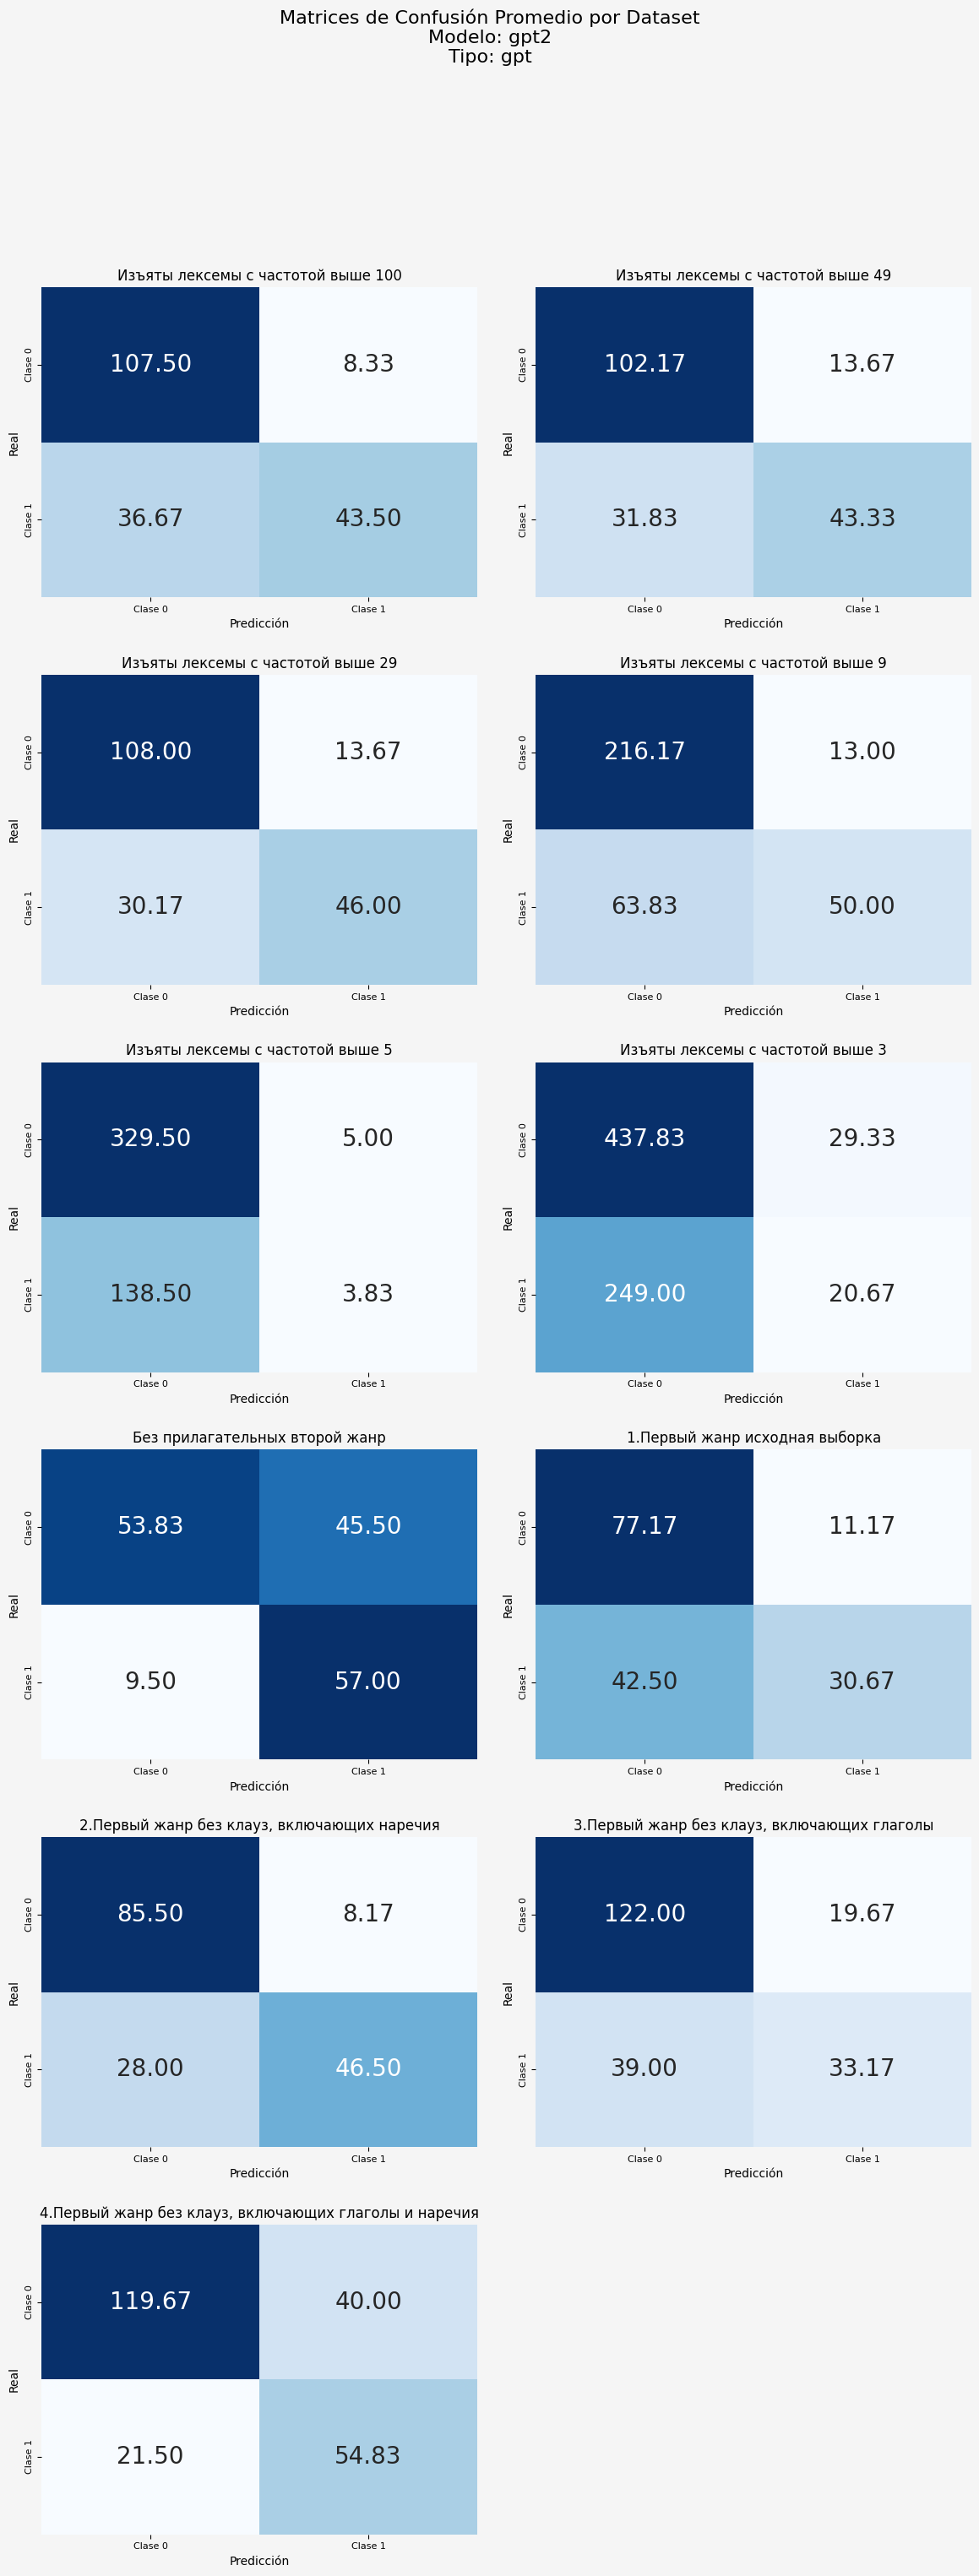


Procesando modelo: facebook/opt-125m
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_facebook_opt-125m.png


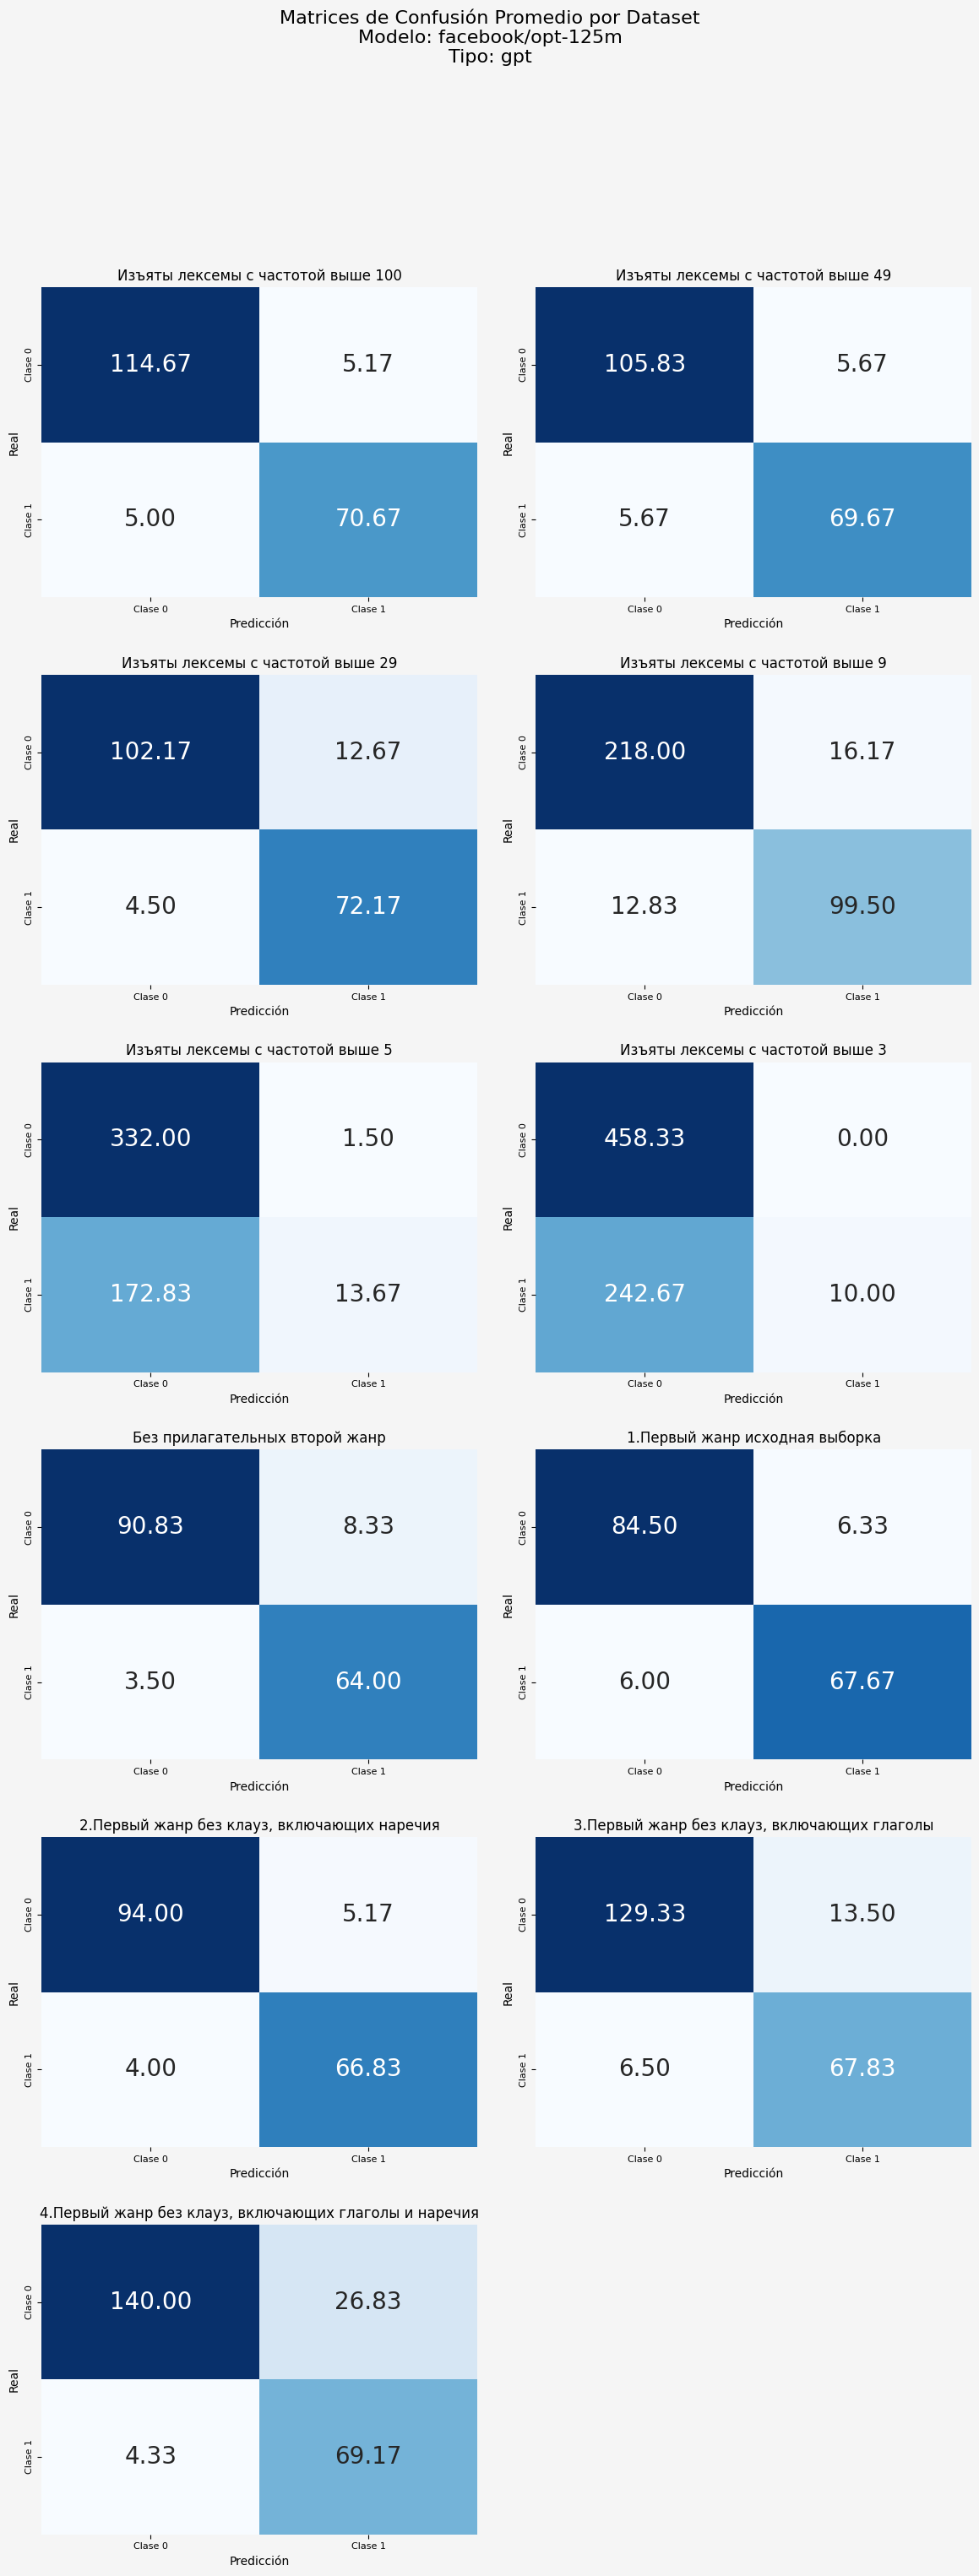


Procesando modelo: sberbank-ai/rugpt3small_based_on_gpt2
Guardado en: large_average_confusion_matrices_by_model/large_average_confusion_matrices_sberbank-ai_rugpt3small_based_on_gpt2.png


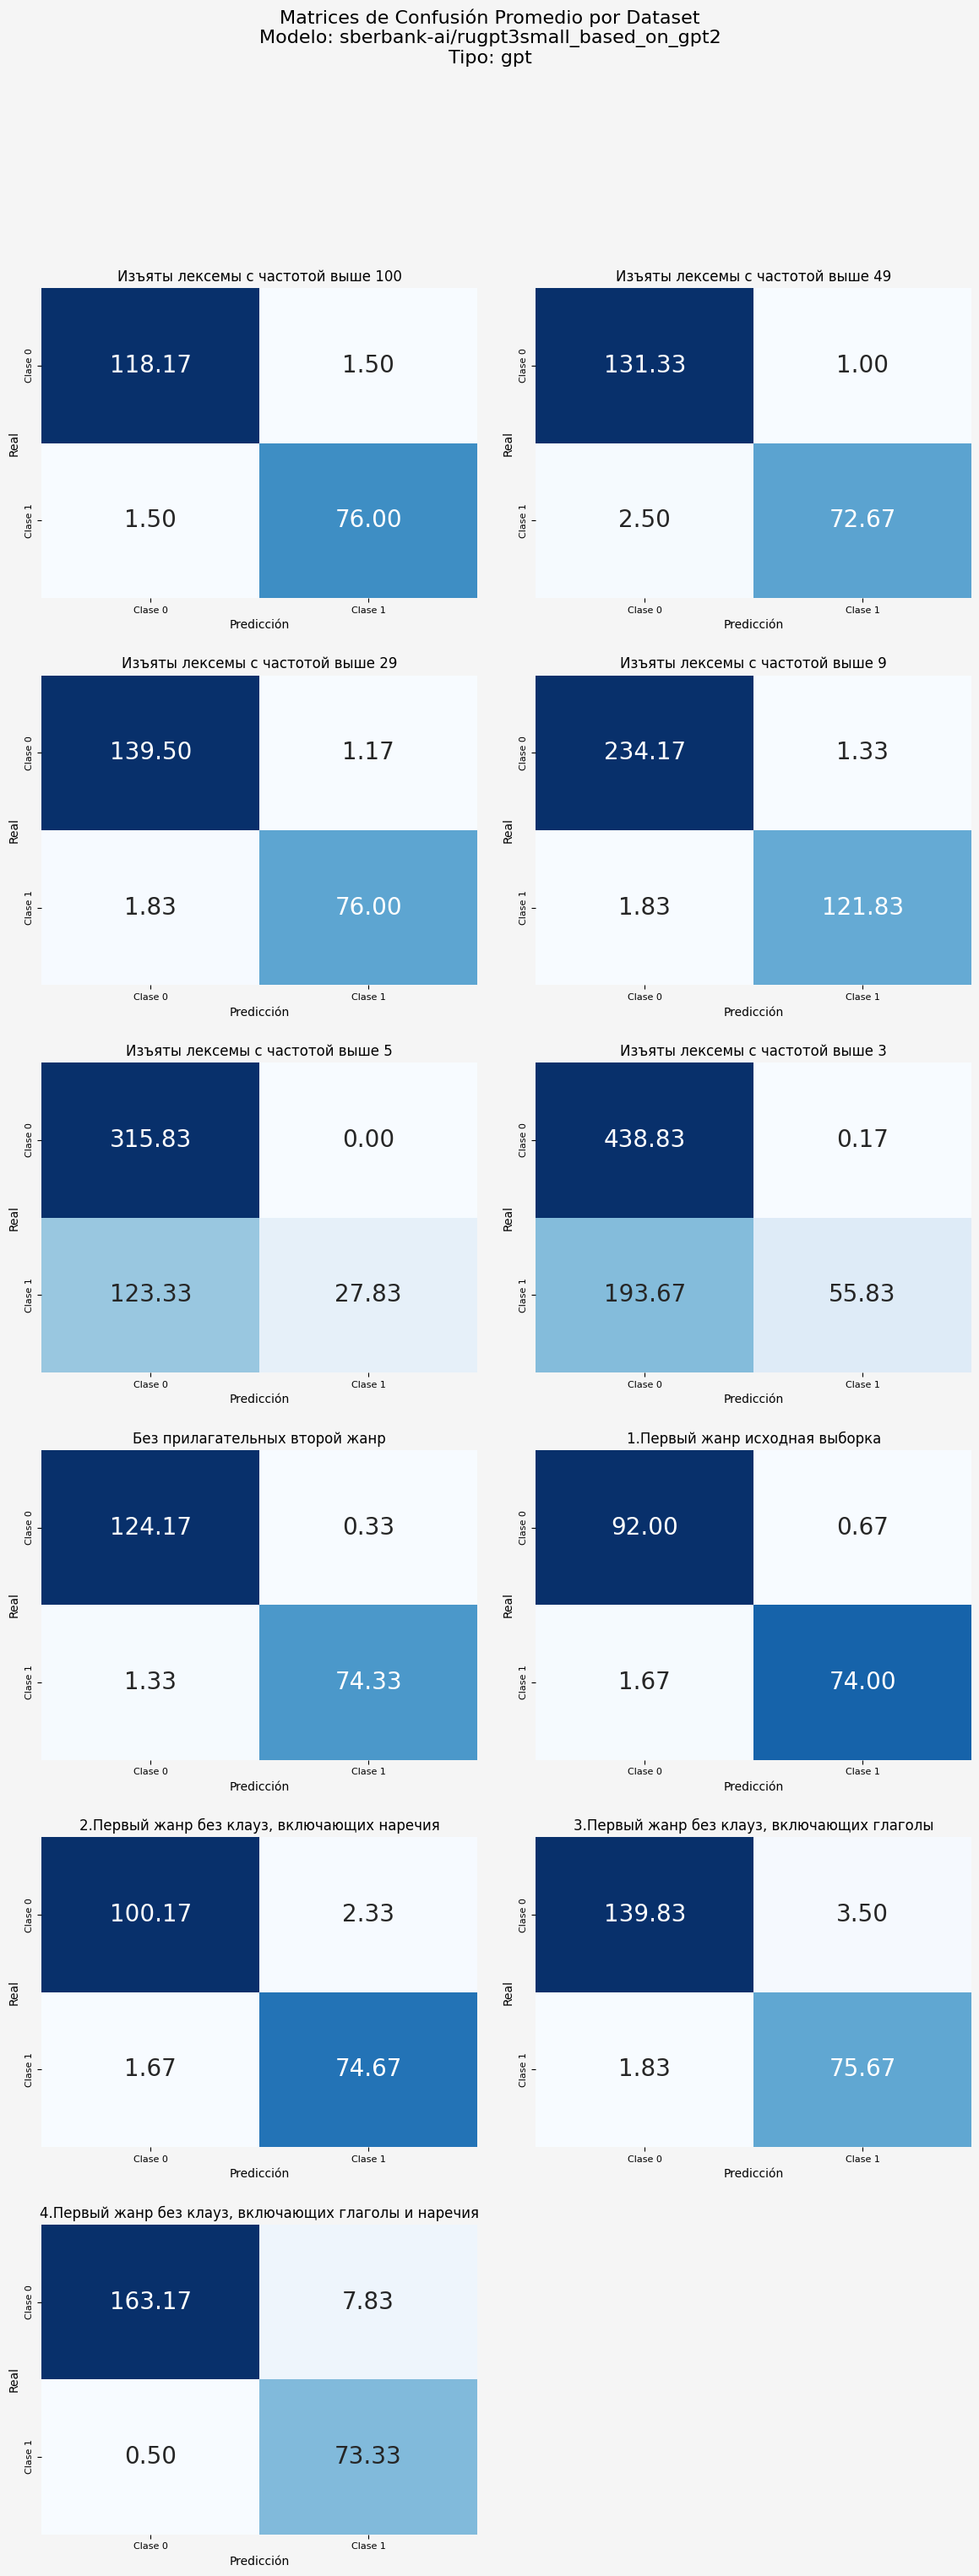


Procesamiento de todos los modelos completado.


In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import logging
from unidecode import unidecode
import math

# Configurar logging
logging.basicConfig(filename='plot_confusion_matrices.log', level=logging.ERROR,
                    format='%(asctime)s - %(message)s')

# Definir paleta de colores pastel
PASTEL_COLORS = [
    '#AEC6CF',  # Azul pastel
    '#FFB6C1',  # Rosa pastel
    '#98FF98',  # Verde pastel
    '#FFDAB9',  # Melocotón pastel
    '#E6E6FA',  # Lavanda pastel
    '#F0E68C',  # Amarillo pastel
    '#ADD8E6',  # Celeste pastel
    '#FFE4E1',  # Rosa suave pastel
    '#90EE90',  # Verde claro pastel
    '#FFFACD',  # Limón pastel
]

def plot_large_average_confusion_matrices_by_model(json_file='resultados_completos_models_datasets.json',
                                                     output_dir='large_average_confusion_matrices_by_model',
                                                     max_cols=3,  # Número máximo de columnas por fila
                                                     subplot_size=(6, 5), # Tamaño de cada subplot
                                                     show_plots=False):
    """
    Genera una imagen por modelo, mostrando las matrices de confusión promedio para cada dataset
    distribuidas en múltiples filas si es necesario, con subgráficos más grandes.

    Args:
        json_file: Ruta al archivo JSON con los resultados.
        output_dir: Directorio de salida para las imágenes.
        max_cols: Número máximo de columnas de subgráficos por fila.
        subplot_size: Tupla (ancho, alto) para el tamaño de cada subgráfico.
        show_plots: Si se muestran los gráficos interactivamente.
    """
    # Cargar resultados desde el JSON
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            results = json.load(f)
    except Exception as e:
        print(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        logging.error(f"Error cargando el archivo JSON {json_file}: {str(e)}")
        return

    # Convertir a DataFrame
    df = pd.DataFrame(results)

    # Verificar columnas necesarias
    required_columns = ['model_name', 'dataset_name', 'avg_confusion_matrix', 'type']
    if not all(col in df.columns for col in required_columns):
        missing_cols = [col for col in required_columns if col not in df.columns]
        print(f"Error: El DataFrame no contiene las columnas necesarias: {missing_cols}")
        print(f"Columnas disponibles: {list(df.columns)}")
        logging.error(f"Columnas faltantes: {missing_cols}. Columnas disponibles: {list(df.columns)}")
        return

    # Obtener modelos únicos
    unique_models = df['model_name'].unique()
    print(f"Encontrados {len(unique_models)} modelos únicos.")

    # Asignar colores pastel a los modelos
    model_colors = {model: PASTEL_COLORS[i % len(PASTEL_COLORS)] for i, model in enumerate(unique_models)}

    # Iterar sobre cada modelo único
    for model_name in unique_models:
        print(f"\nProcesando modelo: {model_name}")

        # Crear el directorio de salida para este modelo (redundante si ya existe, pero seguro)
        os.makedirs(output_dir, exist_ok=True)

        # Filtrar el DataFrame para el modelo actual
        model_df = df[df['model_name'] == model_name]
        unique_datasets = model_df['dataset_name'].unique()
        num_datasets = len(unique_datasets)

        if num_datasets == 0:
            print(f"Advertencia: No se encontraron datasets para el modelo {model_name}.")
            continue

        # Calcular el número de filas y columnas para los subgráficos
        num_rows = math.ceil(num_datasets / max_cols)
        num_cols = min(num_datasets, max_cols)

        # Configurar la figura para el modelo actual
        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(subplot_size[0] * num_cols, subplot_size[1] * num_rows))
        fig.suptitle(f'Matrices de Confusión Promedio por Dataset\nModelo: {model_name}\nTipo: {model_df.iloc[0]["type"] if not model_df.empty else "N/A"}', fontsize=16, y=1.02)
        fig.patch.set_facecolor('#F5F5F5')  # Fondo gris claro para la figura

        # Aplanar la matriz de axes para facilitar la iteración
        if num_datasets > 1:
            axes = axes.flatten()
        else:
            axes = np.array([axes])

        # Iterar sobre cada dataset para el modelo actual y graficar
        for i, dataset_name in enumerate(unique_datasets):
            dataset_results = model_df[model_df['dataset_name'] == dataset_name].iloc[0]
            if 'avg_confusion_matrix' in dataset_results:
                avg_cm = np.array(dataset_results['avg_confusion_matrix'])
                ax = axes[i]
                sns.heatmap(avg_cm, annot=True, fmt=".2f", cmap="Blues", cbar=False,
                            xticklabels=["Clase 0", "Clase 1"],
                            yticklabels=["Clase 0", "Clase 1"],
                            ax=ax,
                            facecolor=model_colors.get(model_name, '#EEEEEE')) # Color de fondo del subplot

                ax.set_title(f'{dataset_name[:]}', fontsize=12)
                ax.set_xlabel('Predicción', fontsize=10)
                ax.set_ylabel('Real', fontsize=10)
                ax.tick_params(axis='both', which='major', labelsize=8)

            else:
                print(f"Advertencia: No se encontró 'avg_confusion_matrix' para el dataset {dataset_name} del modelo {model_name}.")
                logging.warning(f"No se encontró 'avg_confusion_matrix' para el dataset {dataset_name} del modelo {model_name}.")
                if num_datasets > 1:
                    fig.delaxes(axes[i])
                else:
                    fig.delaxes(axes)

        # Ocultar los subgráficos vacíos si hay menos datasets que el número total de subgráficos
        for j in range(num_datasets, num_rows * num_cols):
            if num_datasets > 1:
                fig.delaxes(axes[j])
            elif num_datasets == 1 and num_rows * num_cols > 1:
                pass # No es necesario eliminar si solo hay un subplot

        plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar layout para evitar superposición del título
        safe_model_name = unidecode(model_name.replace('/', '_').replace(' ', '_')[:50])
        output_path = os.path.join(output_dir, f"plots/large_average_confusion_matrices_{safe_model_name}_Step_8.png")
        plt.savefig(output_path, dpi=150, bbox_inches='tight')
        print(f"Guardado en: {output_path}")

        if show_plots:
            plt.show()

        plt.close(fig)

    print("\nProcesamiento de todos los modelos completado.")

# Ejemplo de uso:
plot_large_average_confusion_matrices_by_model(show_plots=True, max_cols=2) # Ejemplo con máximo 2 columnas